# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import re
import string
from collections import Counter
from scipy import stats

from scipy.sparse import csr_matrix
from pandas.api.types import is_numeric_dtype
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

from IPython.core.display import HTML
from sklearn.utils import shuffle

from pickle import load, dump

import warnings
warnings.filterwarnings('ignore')


# Importing Datasets

In [2]:
# Importing the Book's dataset
books = pd.read_csv('C:/Users/prash/Downloads/Excelr/Attempt 2/Project/P279/Books.csv', encoding = 'Latin-1')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
# Importing the user's dataset
user = pd.read_csv('C:/Users/prash/Downloads/Excelr/Attempt 2/Project/P279/Users.csv', encoding = 'Latin-1')
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
# Importing the Rating's dataset
rating = pd.read_csv('C:/Users/prash/Downloads/Excelr/Attempt 2/Project/P279/Ratings.csv', encoding = 'Latin-1')
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# EDA

Data understanding & checking missing/null values and duplicate data

# Book's Dataset

In [5]:
# Checking the size of the book's dataset
print('Total numbers of Raws and columns in dataset are:', books.shape)

Total numbers of Raws and columns in dataset are: (271360, 8)


In [6]:
# Summarizing the book's dataset
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
# Checking the null values in books dataset
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
# Checking if there are any duplicate data in book's dataset
books[books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [9]:
# Checking for the book's details in book's dataset
print('Total number of books in dataset:', books['Book-Title'].shape)
print('Total number of Unique books in dataset:', books['Book-Title'].value_counts().shape)

Total number of books in dataset: (271360,)
Total number of Unique books in dataset: (242135,)


In [10]:
# Checking the author's details in book's dataset
print('Total number of authors in dataset:', books['Book-Author'].shape)
print('Total number of Unique authors in dataset:', books['Book-Author'].value_counts().shape)

Total number of authors in dataset: (271360,)
Total number of Unique authors in dataset: (102023,)


In [11]:
# Checking the publisher's details in book's dataset
print('Total number of publishers in dataset:', books['Publisher'].shape)
print('Total number of Unique publishers in dataset:', books['Publisher'].value_counts().shape)

Total number of publishers in dataset: (271360,)
Total number of Unique publishers in dataset: (16807,)


# User's Dataset

In [12]:
# Checking the size of the User's dataset
print('Total numbers of Raws and columns in dataset are:', user.shape)

Total numbers of Raws and columns in dataset are: (278858, 3)


In [13]:
# Summarizing the User's dataset
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [14]:
# Checking the null values in users dataset
user.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [15]:
# Checking the percentage of null values in age's column
print('Total percentage of Null values:', np.round(user['Age'].isna().sum()/len(user), 4)*100)

Total percentage of Null values: 39.72


In [16]:
# Checking if there are any duplicate values in User's dataset
user[user.duplicated()]

,User-ID,Location,Age


In [17]:
# Checking Userid's details in User's dataset
print('Total number of UserIds are in Dataset:', user['User-ID'].shape)
print('Total number of Unique UserIDs are in Dataset:', user['User-ID'].value_counts().shape)

Total number of UserIds are in Dataset: (278858,)
Total number of Unique UserIDs are in Dataset: (278858,)


# Rating's Dataset

In [18]:
# Checking the size of the Rating's dataset
print('Total numbers of Raws and columns in dataset are:', rating.shape)

Total numbers of Raws and columns in dataset are: (1149780, 3)


In [19]:
# Summarizing the Rating's dataset
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [20]:
# Checking the null values in Rating's dataset
rating.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [21]:
# Checking if tere are any duplicate value in Rating's dataset
rating[rating.duplicated()]

,User-ID,ISBN,Book-Rating


In [22]:
# Checking for the unique userids in Rating's dataset
print('Total number of UserIds in Dataset:', rating['User-ID'].shape)
print('Total number of Unique UserIds in Dataset:', rating['User-ID'].value_counts().shape)

Total number of UserIds in Dataset: (1149780,)
Total number of Unique UserIds in Dataset: (105283,)


In [23]:
# Checking the Rating Scale in Rating's Dataset
print('Rating Scale:', sorted(rating['Book-Rating'].unique()))

Rating Scale: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# From above analysis:
    We can say that, there are no duplicated value in all 3 datasets.
    But, we have negligible null values in books dataset for 3 columns. We will try to impute values from internet.
    We have almost 40% null values in ratings dataset for Age column, will try to explore the data further and will remove it if found not significant for our analysis or if possible try to impute it accordingly.

# Data Cleaning:
    Removing insignificant columns from dataset
    Imputing missing, nan & incorrect values in dataset
    Arranging the string formatting, extracting values from column into separate columns
    Joining the datasets into a single dataframe

# Book's Dataset

In [24]:
# Dropping the insignificant columns from dataset
books.drop(['Image-URL-S'], axis = 1, inplace = True)

In [25]:
# Imputing the Missing Values
# Reviewing the null values in book's dataset

books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [26]:
# Locating the index of the null value for author column
np.where(books.isnull()['Book-Author'])

(array([187689], dtype=int64),)

In [27]:
# Reviewing the specific null value row
books.iloc[[187689], :5]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [28]:
# Retrieving the full name of book
books['Book-Title'][187689]

'The Credit Suisse Guide to Managing Your Personal Wealth'

In [29]:
# Imputing the missing data in books dataset from Internet
books.iloc[[187689], 2] = 'Larissa Anne Downes'

In [30]:
# Reviewing after imputation the specific row
books.iloc[[187689], :5]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,Larissa Anne Downes,1995,Edinburgh Financial Publishing


In [31]:
# Checking the null values after imputing in the books dataset
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [32]:
# Locating the index value of Nan value for publisher column
np.where(books.isnull()['Publisher'])

(array([128890, 129037], dtype=int64),)

In [33]:
# Reviewing the specific null value rows
books.iloc[[128890, 129037], :5]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [34]:
# Imputing the missing data in books dataset from Internet
books.iloc[[128890, 129037], 4] = ["Novelbooks", "Bantam"]

In [35]:
# Reviewing after imputation the specific null value row
books.iloc[[128890, 129037], :5]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,Novelbooks
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,Bantam


In [36]:
# Checking the null values after imputing Publishers in the books dataset
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [37]:
# Locating the index value of Nan value for Large Image Url column
np.where(books.isnull()['Image-URL-L'])

(array([209538, 220731, 221678], dtype=int64),)

In [38]:
# Reviewing the specific null value rows
books.iloc[[209538, 220731, 221678], 1:]

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Image-URL-L
209538,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [39]:
# Retrieving the full name of book for 209538
books['Book-Title'][209538]

'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"'

In [40]:
# Retrieving the full name of book for 220731
books['Book-Title'][220731]

'Peuple du ciel, suivi de \'Les Bergers\\";Jean-Marie Gustave Le ClÃ?Â©zio"'

In [41]:
# Retrieving the full name of book for 221678
books['Book-Title'][221678]

'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"'

In [42]:
# Imputing the missing data in books dataset from Internet
books.iloc[[209538, 220731, 221678], -1] = ["https://m.media-amazon.com/images/I/91AiFZTtfCL.jpg", 
                                            "https://m.media-amazon.com/images/I/51PVH42QJPL.jpg", 
                                            "https://m.media-amazon.com/images/I/51ZGVGH05SL.jpg"]

In [43]:
# Reviewing the specific null value rows after imputing the Image URL
books.iloc[[209538, 220731, 221678], 1:]

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Image-URL-L
209538,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,https://m.media-amazon.com/images/I/91AiFZTtfC...
220731,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,https://m.media-amazon.com/images/I/51PVH42QJP...
221678,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,https://m.media-amazon.com/images/I/51ZGVGH05S...


In [44]:
# Checking the null values after imputing the image's URL in the books dataset
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-M            0
Image-URL-L            0
dtype: int64

# Note:
    We have successfully, imputed the missing values from Internet.
    But, we have discovered, there were some values in specific columns which is swapped & does not belong to a specific column.
    Hence, we will check values of all the columns and if found incorrect will treat them accordingly.

In [45]:
# Retrieving the string values for all significant columns in books dataset
books.loc[books['Book-Author']=='2000', :] 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,https://m.media-amazon.com/images/I/91AiFZTtfC...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,https://m.media-amazon.com/images/I/51ZGVGH05S...


In [46]:
# Retrieving the correct author for the above row
books['Book-Title'][209538]

'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"'

In [47]:
# Retrieving the correct author for the above row
books['Book-Title'][221678]

'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"'

In [48]:
# Replacing with correct values for author in books dataset
books.iloc[[209538, 221678], 2] = ['Michael Teitelbaum', 'James Buckley']

In [49]:
# Replacing with correct values for book title in books dataset
books.iloc[[209538, 221678], 1] = ['Creating the X-Men: How It All Began', 'Creating the X-Men: How Comic Books Come to Life']

In [50]:
# Replacing with correct values for publisher in books dataset
books.iloc[[209538, 221678], 4] = 'DK Publishing Inc'

In [51]:
# Retrieving the string values for all significant columns in books dataset
books.loc[books['Book-Author']=='2003', :] 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,https://m.media-amazon.com/images/I/51PVH42QJP...


In [52]:
# Retrieving the correct author for the above row
books['Book-Title'][220731]

'Peuple du ciel, suivi de \'Les Bergers\\";Jean-Marie Gustave Le ClÃ?Â©zio"'

In [53]:
# Replacing with correct values for author in books dataset
books.iloc[[220731], 2] = 'Jean-Marie Gustave Le ClÃzio'

In [54]:
# Replacing with correct values for book title in books dataset
books.iloc[[220731], 1] = 'Peuple Du Ciel Suivi de les Bergers'

In [55]:
# Replacing with correct values for publisher in books dataset
books.iloc[[220731], 4] = 'Gallimard'

In [56]:
# Checking the unique values for Year of publication in books dataset
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [57]:
# Retrieving the string values for Year of Publication column in books dataset
books.loc[books['Year-Of-Publication']=='DK Publishing Inc', :] 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Image-URL-L
209538,078946697X,Creating the X-Men: How It All Began,Michael Teitelbaum,DK Publishing Inc,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,https://m.media-amazon.com/images/I/91AiFZTtfC...
221678,0789466953,Creating the X-Men: How Comic Books Come to Life,James Buckley,DK Publishing Inc,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,https://m.media-amazon.com/images/I/51ZGVGH05S...


In [58]:
# Replacing with correct values for Year of Publication in books dataset
books.iloc[[209538, 221678], 3] = 2000

In [59]:
# Retrieving the string values for all significant columns in books dataset
books.loc[books['Year-Of-Publication']=='Gallimard', :] 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Image-URL-L
220731,2070426769,Peuple Du Ciel Suivi de les Bergers,Jean-Marie Gustave Le ClÃzio,Gallimard,Gallimard,http://images.amazon.com/images/P/2070426769.0...,https://m.media-amazon.com/images/I/51PVH42QJP...


In [60]:
# Replacing with correct values for Year of Publication in books dataset
books.iloc[[220731], 3] = 2003

In [61]:
# Changed the datatype to numeric for Year of Publication 
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int')

In [62]:
# Checking the datatype of Year of Publication
books['Year-Of-Publication'].dtypes

dtype('int32')

In [63]:
# Reviewing the dataset after making corrections in all the columns
books.iloc[[209538, 221678, 220731],:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Image-URL-L
209538,078946697X,Creating the X-Men: How It All Began,Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,https://m.media-amazon.com/images/I/91AiFZTtfC...
221678,0789466953,Creating the X-Men: How Comic Books Come to Life,James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,https://m.media-amazon.com/images/I/51ZGVGH05S...
220731,2070426769,Peuple Du Ciel Suivi de les Bergers,Jean-Marie Gustave Le ClÃzio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,https://m.media-amazon.com/images/I/51PVH42QJP...


In [64]:
# Reviewing the Year of Publication after making correction
print(np.sort(books['Year-Of-Publication'].unique()))

[   0 1376 1378 1806 1897 1900 1901 1902 1904 1906 1908 1909 1910 1911
 1914 1917 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930
 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944
 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958
 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2008 2010 2011 2012 2020 2021 2024 2026
 2030 2037 2038 2050]


In [65]:
# Uppercasing all alphabets in ISBN
books['ISBN'] = books['ISBN'].str.upper()

In [66]:
# Checking the duplicate values (if any)
books[books.duplicated()].shape

(313, 7)

In [67]:
# Dropping duplicate values
books.drop_duplicates(inplace = True)
books.reset_index(drop = True, inplace = True)

In [68]:
# Checking the size of the book's dataset
print('Total numbers of Raws and columns in dataset are:', books.shape)

Total numbers of Raws and columns in dataset are: (271047, 7)


# Note:
    We have successfully, replaced the incorrect values with correct values for specific columns.
    We have noticed, there were some values in Year of Publication columns which is zero & future years.
    We removed the duplicate values from books dataset as well.
    Hence, we will try to explore them further & will treat them accordingly.

In [69]:
# Checking the minimum count of values in Year of Publication
count = Counter(books['Year-Of-Publication'])
print(np.sort([k for k, v in count.items() if v == min(count.values())]))

[1376 1378 1806 1897 1904 1906 1908 1910 1914 1917 1919 1934 2008 2012
 2021 2024 2026 2037 2038]


In [70]:
# Checking the maximum count of values in Year of Publication
count = Counter(books['Year-Of-Publication'])
print(np.sort([k for k, v in count.items() if v == max(count.values())]))

[2002]


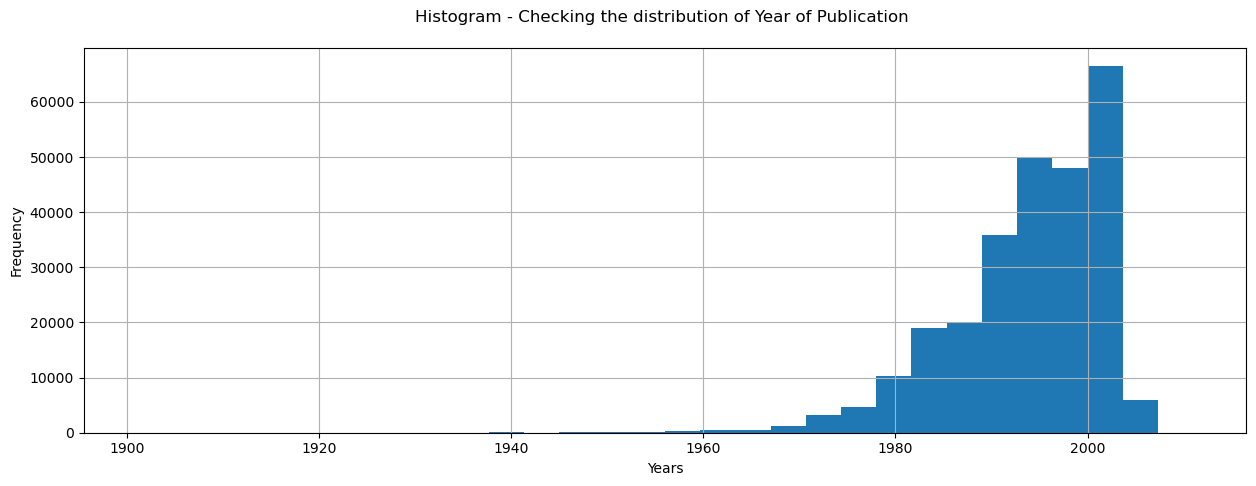

In [71]:
# Visualizing the Year of Publication using Histogram
books[(books['Year-Of-Publication']>1900) & (books['Year-Of-Publication']<=2011)].hist(figsize=(15,5), bins=30)
plt.title('Histogram - Checking the distribution of Year of Publication \n')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

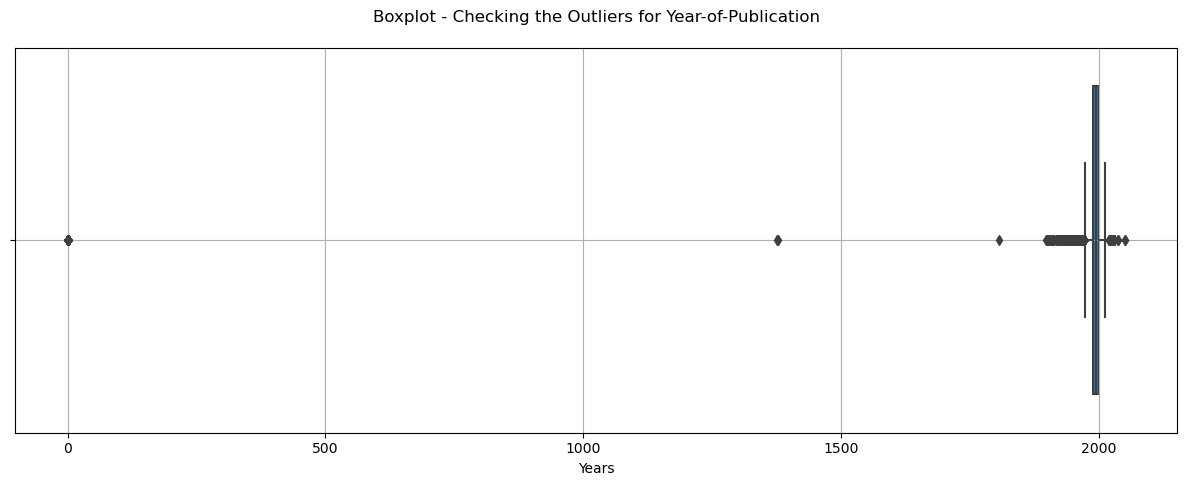

In [72]:
# Visualising the Year of Publication using Boxplot
plt.figure(figsize = (15,5))
sns.boxplot(x = books['Year-Of-Publication'])
plt.title('Boxplot - Checking the Outliers for Year-of-Publication\n')
plt.xlabel('Years')
plt.grid()
plt.show()

In [73]:
# Checking the Statistical Summary for the column Year of Publication
books[books['Year-Of-Publication']>0].describe().round()

,Year-Of-Publication
count,266436.0
mean,1994.0
std,8.0
min,1376.0
25%,1989.0
50%,1996.0
75%,2000.0
max,2050.0


In [74]:
# IQR method of Outlier treatment & filtering only valid values 
max_thresold = books['Year-Of-Publication'].quantile(0.95)
min_thresold = books['Year-Of-Publication'].quantile(0.05)
df = books[(books['Year-Of-Publication']<max_thresold) & (books['Year-Of-Publication']>min_thresold)]
df.shape

(236987, 7)

In [75]:
# Checking the Statistical Summary after IQR filtered data
df[['Year-Of-Publication']].describe().round()

,Year-Of-Publication
count,236987.0
mean,1994.0
std,6.0
min,1977.0
25%,1990.0
50%,1995.0
75%,1999.0
max,2002.0


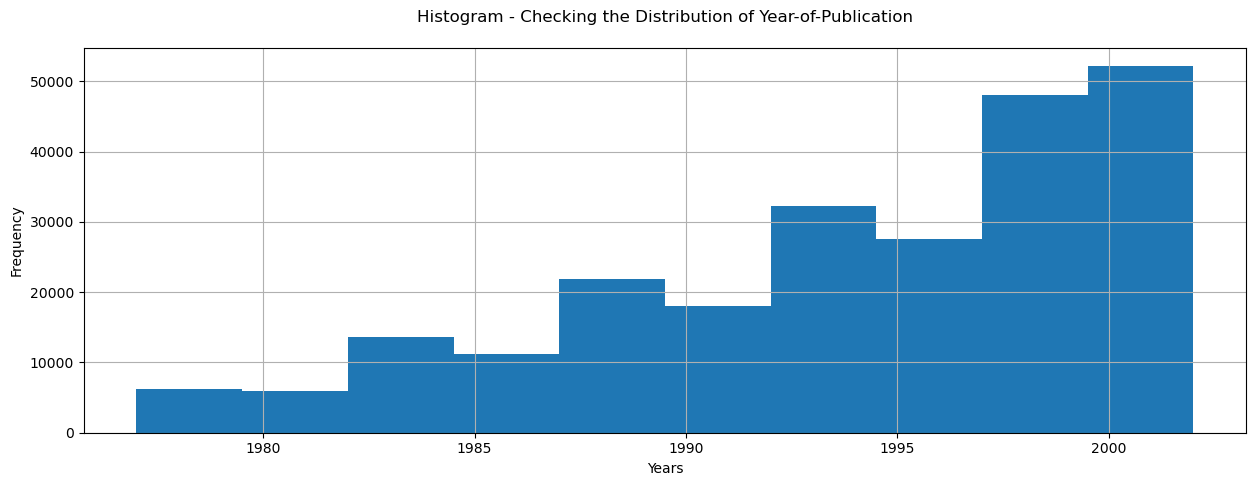

In [76]:
# Visualising the IQR filtered data using Histogram
df['Year-Of-Publication'].hist(figsize = (15,5))
plt.title('Histogram - Checking the Distribution of Year-of-Publication\n')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

# Note:
    There are outliers present in Year of publication, and also data is not normally distributed instead it is left skewed.
    We cannot apply Mean method to replace the values in our dataset in presence of outliers.
    We have filtered the data using Inter Quarrtile Range (IQR) method with threshold of 95%, thus we can see the improvement in statistical measures as well as in skewness.
    We can go with Median, as median has less impact in presence of outliers.
    Other option we have is replacing the values with mode (highest frequency).

In [77]:
# Replacing the zero & future date values with most frequent year
books.loc[books['Year-Of-Publication'] > 2021, 'Year-Of-Publication'] = 2002
books.loc[books['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

In [78]:
# Reviewing the Year of Publication after making above changes
print(np.sort(books['Year-Of-Publication'].unique()))

[1376 1378 1806 1897 1900 1901 1902 1904 1906 1908 1909 1910 1911 1914
 1917 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931
 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945
 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959
 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2008 2010 2011 2012 2020 2021]


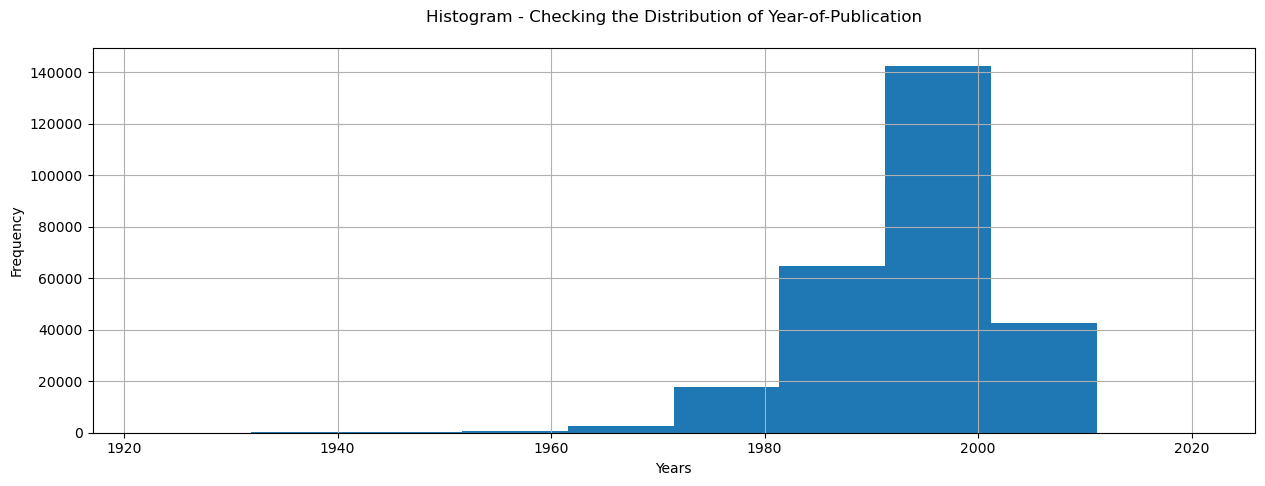

In [79]:
# Visualising the IQR filtered data using Histogram after replacement
books[(books['Year-Of-Publication']>1921) & (books['Year-Of-Publication']<=2021)].hist(figsize=(15,5))
plt.title('Histogram - Checking the Distribution of Year-of-Publication\n')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

# Note :
    As we can see from above analysis, after replacing the extreme outlier values with mode year (2002) the distribution seems to be fairly symmetrical.
    We have successfully fixed the incorrect, zero values appropriately for Books dataset.
    Let's try fixing other dataset as well.

# User's Dataset

In [80]:
# Reviewing the dataset
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# Note:
    There are no insignificant columns in users dataset to be dropped.
    But, there are missing values in Age column which needs to be imputed.
    Location column data has to be arranged properly by separating into different columns.

In [81]:
# Splitting Location to city, state, country
list_ = user.Location.str.split(', ')

city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  #removing invalid entries too
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   #removing invalid entries 
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())
        
user = user.drop('Location',axis=1)

temp = []
for ent in city:
    c = ent.split('/')            #handling cases where city/state entries from city list as state is already given 
    temp.append(c[0])

df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

user = pd.concat([user, df_city], axis=1)
user = pd.concat([user, df_state], axis=1)
user = pd.concat([user, df_country], axis=1)

print('No. of countries did not have any values: ',count_no_country) #printing the number of countries didnt have any values 
print('No. of states did not have any values: ', count_no_state)     #printing the states which didnt have any values

No. of countries did not have any values:  4659
No. of states did not have any values:  16044


In [82]:
# Dropping duplicate rows
user.drop_duplicates(inplace = True)
user.reset_index(drop = True, inplace = True)

In [83]:
# Reviewing the column after making above changes in data
user.head()

,User-ID,Age,City,State,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


In [84]:
# Check for all present values in Age column
print(np.sort(list(user['Age'].unique())))

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 113. 114. 115. 116. 118. 119. 123. 124. 127. 128. 132. 133. 136. 137.
 138. 140. 141. 143. 146. 147. 148. 151. 152. 156. 157. 159. 162. 168.
 172. 175. 183. 186. 189. 199. 200. 201. 204. 207. 208. 209. 210. 212.
 219. 220. 223. 226. 228. 229. 230. 231. 237. 239. 244.  nan]


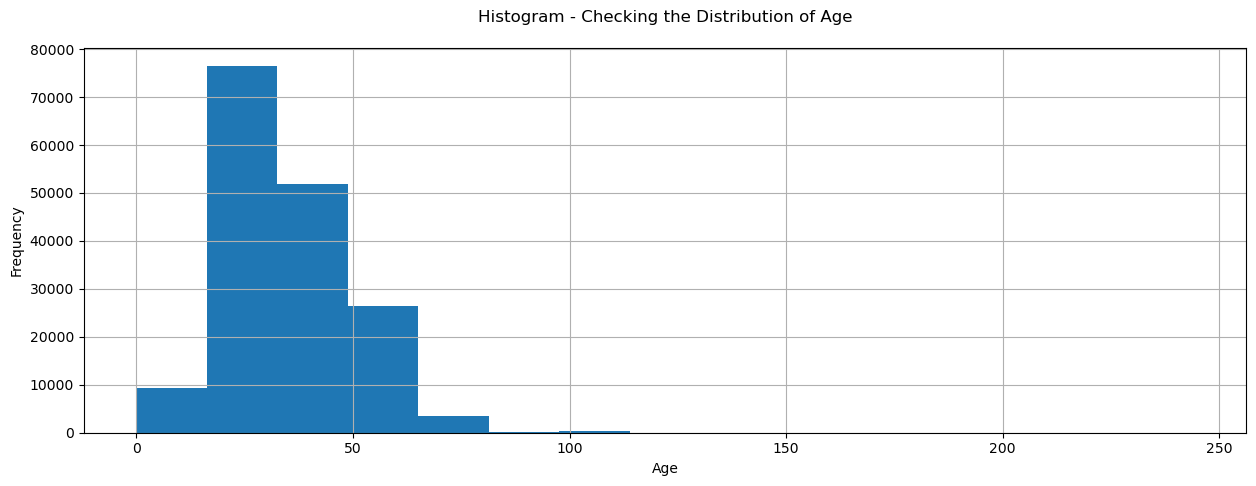

In [85]:
# Visualising the Age filtered data using Histogram
user['Age'].hist(figsize=(15,5), bins=15)
plt.title('Histogram - Checking the Distribution of Age\n')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

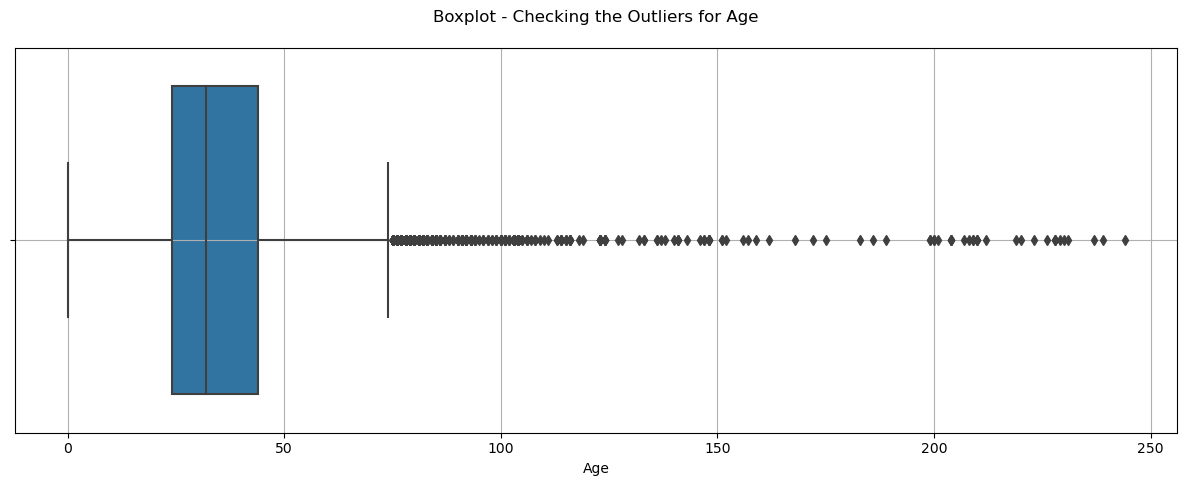

In [86]:
# Visualising the Age using Boxplot
plt.figure(figsize=(15,5))
sns.boxplot(x=user['Age'])
plt.title('Boxplot - Checking the Outliers for Age\n')
plt.xlabel('Age')
plt.grid()
plt.show()

In [87]:
# Checking the Statistical Summary on Age data
user[['Age']].describe()

,Age
count,168096.000000
mean,34.751434
std,14.428097
min,0.000000
25%,24.000000
50%,32.000000
75%,44.000000
max,244.000000


In [88]:
# Filtering the Age column for further analysis
xz = user[(user['Age']>0) & (user['Age']<91)][['Age']].reset_index()
xz.shape

(167250, 2)

In [89]:
# Checking the max count of values in a specific column
count = Counter(xz['Age'])
print(np.sort([k for k, v in count.items() if v == max(count.values())]))

[24.]


In [90]:
# Checking the Statistical Summary on Filtered Age data
xz[['Age']].describe()

,Age
count,167250.000000
mean,34.631546
std,13.678802
min,1.000000
25%,24.000000
50%,32.000000
75%,44.000000
max,90.000000


In [91]:
# IQR method of Outlier treatment & filtering only valid values 
max_thresold = user['Age'].quantile(0.95)
min_thresold = user['Age'].quantile(0.05)
df = user[(user['Age']<max_thresold) & (user['Age']>min_thresold)]
df.shape

(149636, 5)

In [92]:
# Checking the Statistical Summary on IQR filtered data
df[['Age']].describe()

,Age
count,149636.000000
mean,34.040104
std,11.148989
min,17.000000
25%,25.000000
50%,32.000000
75%,42.000000
max,59.000000


In [93]:
# Checking the Country wise median age
stats.mode(user['Age'].groupby(user['Country']).median()[user['Country'].value_counts().index[0:100]])

ModeResult(mode=array([29.]), count=array([12]))

In [94]:
# Checking the States wise median age
stats.mode(user['Age'].groupby(user['State']).median()[user['State'].value_counts().index[0:1000]])

ModeResult(mode=array([29.]), count=array([65]))

# Note :
    We have successfully, splitted the location column into state & country.
    On other hand, there are nan, extreme values present in Age column which needs to be imputed.
    We will choose a bracket of 8 years to 90 years for imputing the extreme values in dataset.
    As, a kid below 8 years will not be reading a book by himself independently.
    Also, an individual above 90 years will find difficulty in eyesight and may not be in position to read given his health conditions.
    For Nan values, we will impute with median as its neutral in presence of outlier & also the median for state & country is close to the age of 32 years.

In [95]:
# Replacing the extreme & nan values with age bracket, median respectively
user.loc[user['Age'] > 90, 'Age'] = 90     
user.loc[user['Age'] < 8, 'Age'] = 8    
user['Age'] = user['Age'].fillna(xz['Age'].median())      #filling null values with mean
user['Age'] = user['Age'].astype(int) 

In [96]:
# Check for all values present in Age column
print(np.sort(list(user['Age'].unique())))

[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79
 80 81 82 83 84 85 86 87 88 89 90]


In [97]:
# Reviewing the data
user.head()

,User-ID,Age,City,State,Country
0,1,32,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,32,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,32,farnborough,hants,united kingdom


# Rating's Dataset

In [98]:
# Reviewing the data
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


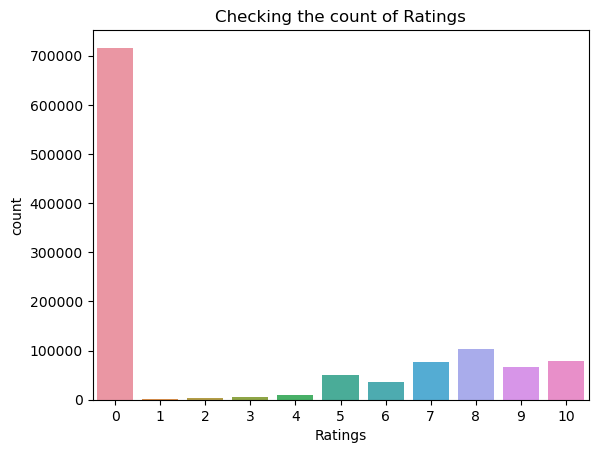

In [99]:
# Visualising the Rating dataset using boxplot
sns.countplot(x = rating['Book-Rating'])
plt.title('Checking the count of Ratings')
plt.xlabel('Ratings')
plt.show()

In [100]:
# Checking if the ratings contains only numeric value
print(is_numeric_dtype(rating['Book-Rating']))

True


In [101]:
# Checking if the User Ids contains only numeric value
print(is_numeric_dtype(rating['User-ID']))

True


In [102]:
# Checking if the ISBN contains anly alphabetic value
flag = 0
reg = "[^A-Za-z0-9]"
for x in rating['ISBN']:
    z = re.search(reg,x)
    if z:
        flag = 1
if flag == 1:
    print("False")
else:
    print("True")

False


In [103]:
# Removing extra characters from ISBN (from rating's dataset) existing in Book's dataset
BISBN = books['ISBN'].tolist()
reg = "[^A-Za-z0-9]"
for index, row_Value in rating.iterrows():
    z = re.search(reg, row_Value['ISBN'])
    if z:
        f = re.sub(reg,"",row_Value['ISBN'])
        if f in BISBN:
            rating.at[index, 'ISBN'] = f

In [104]:
# Upper casing all alphabets in ISBN
rating['ISBN'] = rating['ISBN'].str.upper()

In [105]:
# Checking for the duplicated values
rating[rating.duplicated()]

,User-ID,ISBN,Book-Rating
352434,84784,0140177396,8
740759,179075,0533132681,9
1119830,268682,0140296409,0
1119892,268691,0743202961,0


In [106]:
# Dropping the dupliated values
rating.drop_duplicates(inplace = True)
rating.reset_index(drop = True, inplace = True)

In [107]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [108]:
# Checking the rating's info
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149776 entries, 0 to 1149775
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149776 non-null  int64 
 1   ISBN         1149776 non-null  object
 2   Book-Rating  1149776 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


# Note:
    As we can see, there are no null values nor any duplicate or missing values to be imputed in ratings dataset.
    Also, there are no outliers present in ratings dataset.
    We can observe, that the zero ratings probably the user who didn't gave any ratings to book yet is quite high when compared to other ratings collectively.
    We will try to explore our datasets further and draw inference on visualisations after merging them.
    So, we can join the 3 datasets into 1 using joins function which is similar to SQL joins.
    With the joined dataset it will be easy to analyse, visualize and build the model.

# Merging the Datasets

In [109]:
# Merging the books, rating and User dataset
df1 = books.merge(rating, on = "ISBN", how = 'inner')
df = df1.merge(user, on = "User-ID", how = 'inner')

In [110]:
# Reveiwing the Merged data
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,18,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,32,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,32,timmins,ontario,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,32,timmins,ontario,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,32,timmins,ontario,canada


In [111]:
# Re-arranging the colomns of the dataset as per the need
df = df[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher','User-ID','Book-Rating','Age','City','State',
             'Country','Image-URL-M','Image-URL-L']]
df.head()    

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18,stockton,california,usa,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,32,timmins,ontario,canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,32,timmins,ontario,canada,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,32,timmins,ontario,canada,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,32,timmins,ontario,canada,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [112]:
# Transform each author name to capitalized format
df['Book-Author'] = df['Book-Author'].apply(lambda x: x.title())

# Replace ampersands and capitalize book titles
df['Book-Title'] = df['Book-Title'].str.replace('&amp;', 'and').apply(lambda x: x.title())

# Replace ampersands and capitalize publishers
df['Publisher'] = df['Publisher'].str.replace('&amp;','and').apply(lambda x: x.title())

In [113]:
# Extract the last value, which in most cases is the country name.
df['Country'] = df['Country'].apply(lambda x: x.split(',')[-1].strip())

In [114]:
# Remove punctuation
df['Country'] = df['Country'].apply(
    lambda x: x.translate(str.maketrans('', '', string.punctuation)))

df['Country'] = df['Country'].replace(' na', 'other').replace('na', 'other').replace('', 'other')

In [115]:
# Reviewing the shape of joined data
df.shape

(1031609, 13)

In [116]:
# Checking the duplicate values after joining the data
df[df.duplicated()].shape

(0, 13)

In [117]:
# Checking the summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031609 entries, 0 to 1031608
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031609 non-null  object
 1   Book-Title           1031609 non-null  object
 2   Book-Author          1031609 non-null  object
 3   Year-Of-Publication  1031609 non-null  int32 
 4   Publisher            1031609 non-null  object
 5   User-ID              1031609 non-null  int64 
 6   Book-Rating          1031609 non-null  int64 
 7   Age                  1031609 non-null  int32 
 8   City                 1031609 non-null  object
 9   State                1031609 non-null  object
 10  Country              1031609 non-null  object
 11  Image-URL-M          1031609 non-null  object
 12  Image-URL-L          1031609 non-null  object
dtypes: int32(2), int64(2), object(9)
memory usage: 102.3+ MB


In [118]:
# Checking for the null values
df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
User-ID                0
Book-Rating            0
Age                    0
City                   0
State                  0
Country                0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [119]:
# Statistical description of categorical data
df.describe(include='O')

,ISBN,Book-Title,Book-Author,Publisher,City,State,Country,Image-URL-M,Image-URL-L
count,1031609,1031609,1031609,1031609,1031609,1031609,1031609,1031609,1031609
unique,269845,237777,98909,16449,14700,2125,353,269844,269844
top,0971880107,Wild Animus,Stephen King,Ballantine Books,toronto,california,usa,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
freq,2502,2502,10180,34730,15132,106815,746160,2502,2502


In [120]:
# Statistical description of numerical data
df.describe().round()

,Year-Of-Publication,User-ID,Book-Rating,Age
count,1031609.0,1031609.0,1031609.0,1031609.0
mean,1995.0,140595.0,3.0,36.0
std,7.0,80524.0,4.0,11.0
min,1376.0,2.0,0.0,8.0
25%,1992.0,70415.0,0.0,31.0
50%,1997.0,141210.0,0.0,32.0
75%,2001.0,211426.0,7.0,41.0
max,2021.0,278854.0,10.0,90.0


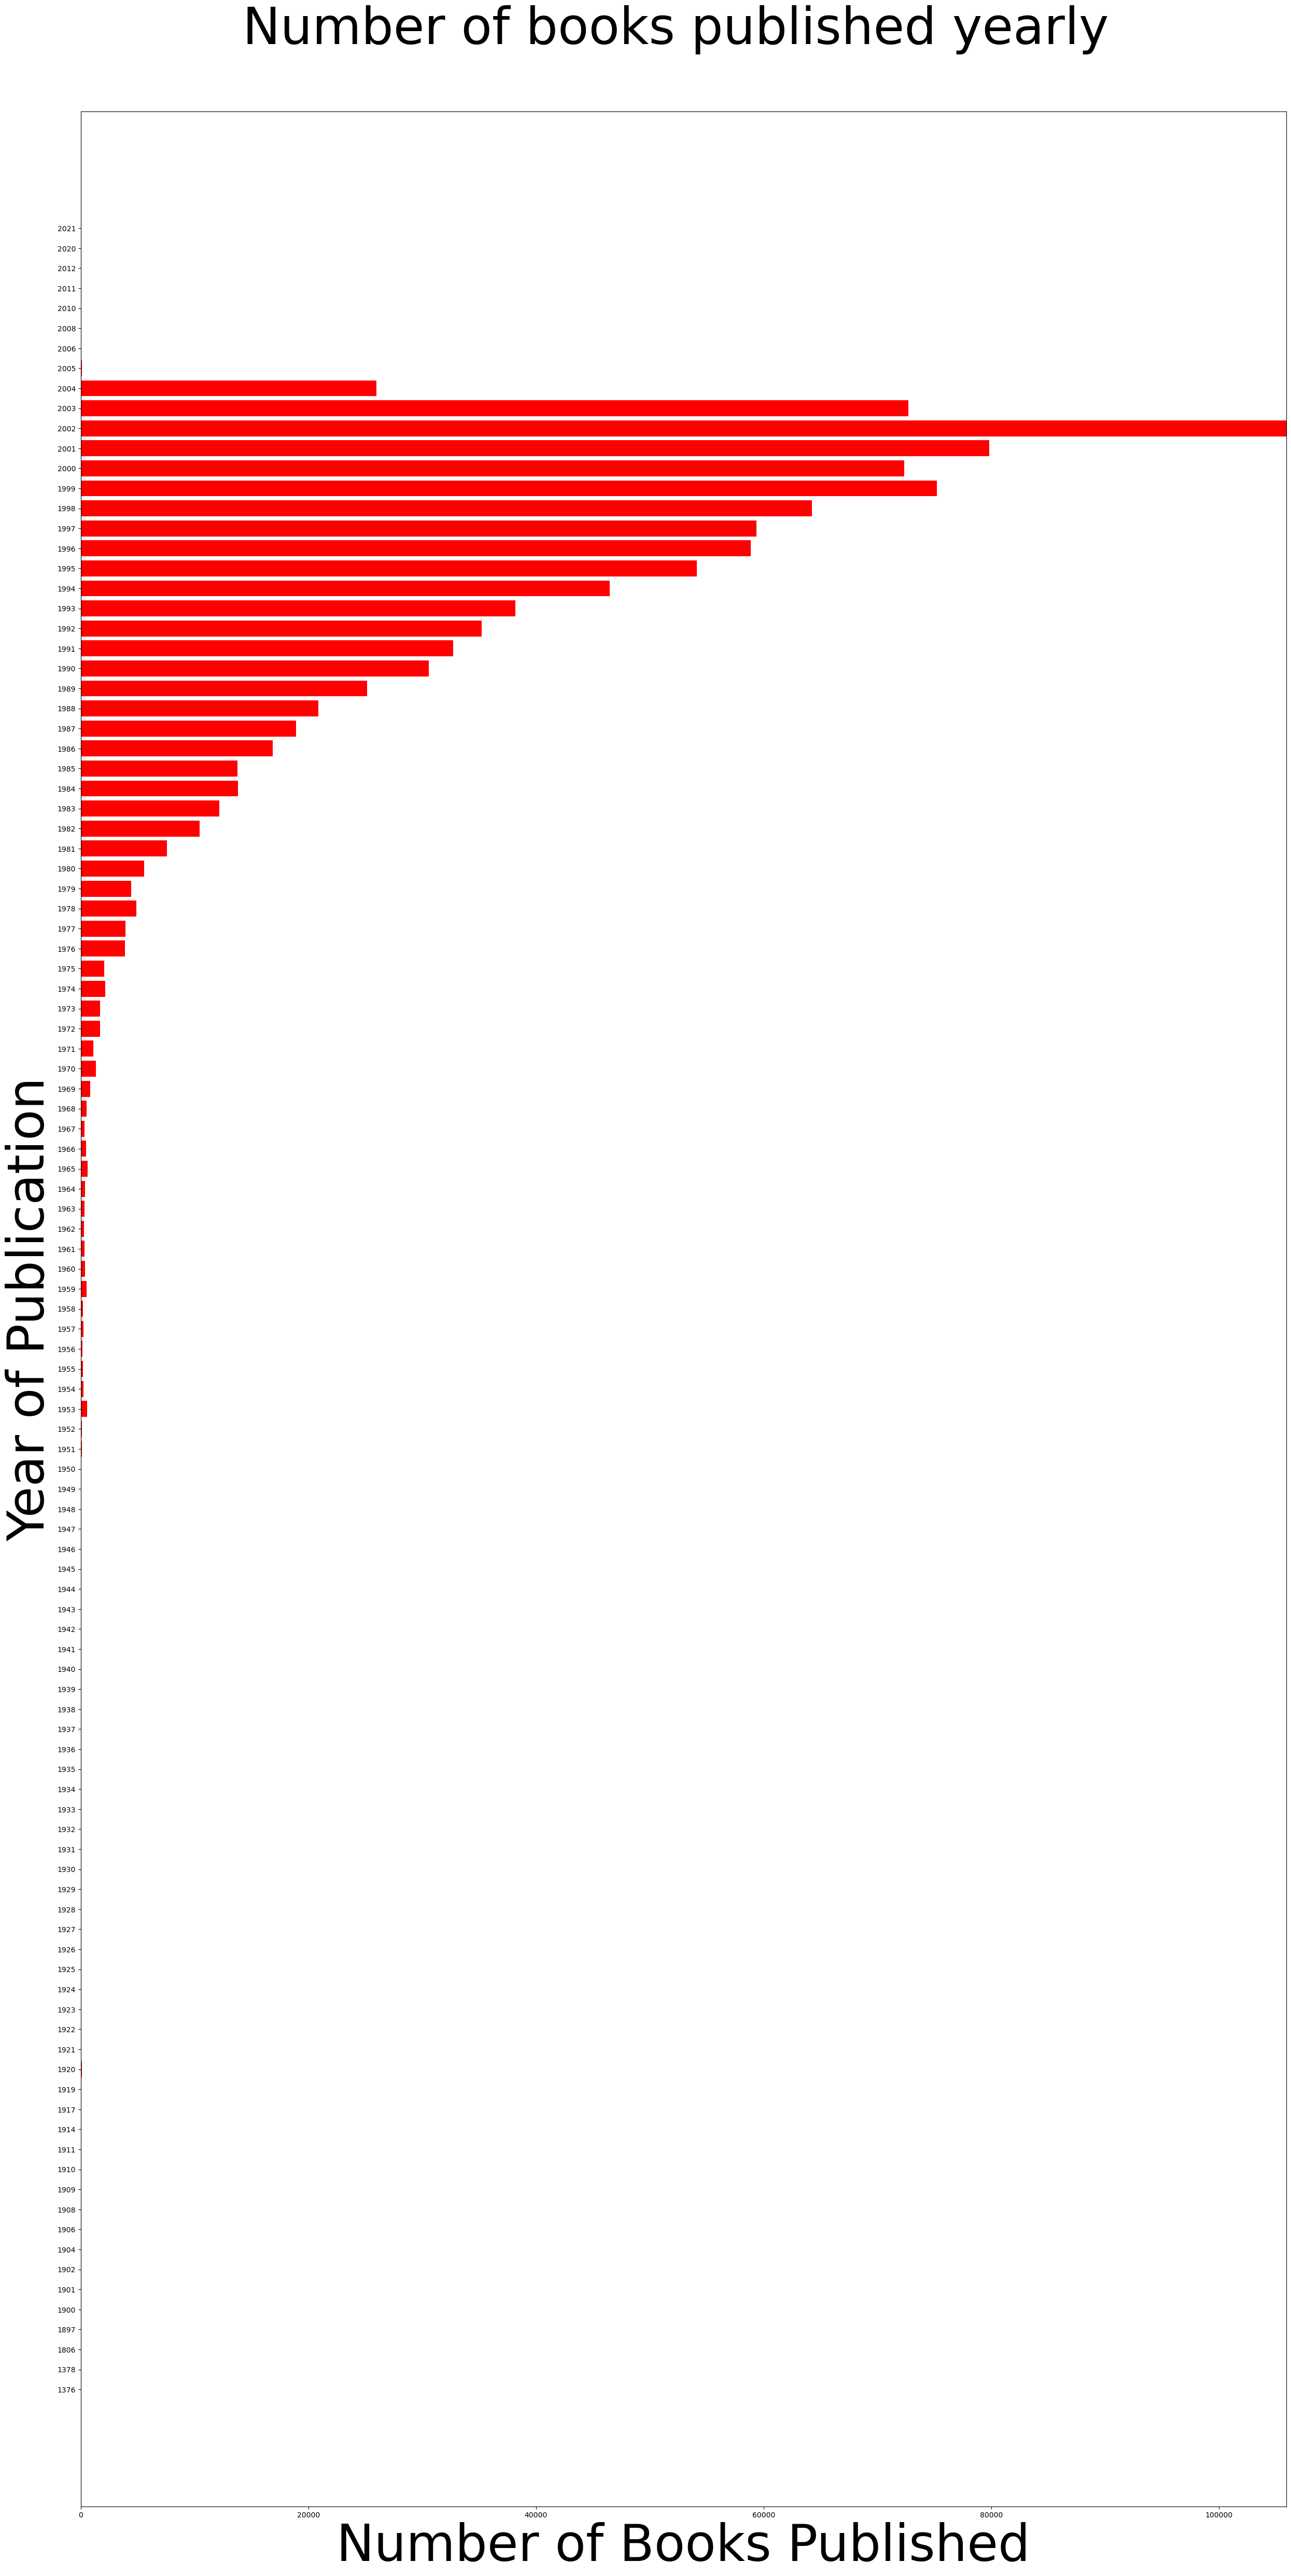

In [121]:
# Visualising the Number of Books published per year
publications = {}
for year in df['Year-Of-Publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] += 1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(30, 60))
plt.barh(list(publications.keys()),list(publications.values()), color = 'red')
plt.xlabel("Number of Books Published", fontsize = 70)
plt.ylabel("Year of Publication", fontsize = 70)
plt.title("Number of books published yearly \n", fontsize = 70)
plt.margins(x = 0)
plt.show()

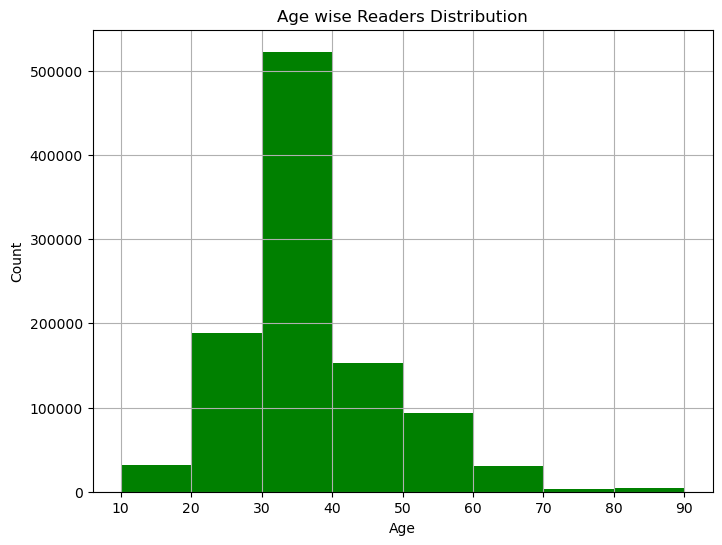

In [122]:
# Visualising the Age wise readers 
plt.figure(figsize=(8,6))
df.Age.hist(bins=[10*i for i in range(1, 10)], color='green')     
plt.title('Age wise Readers Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [123]:
# Creating a bins based on age groups
df['Age_group'] = pd.cut(df['Age'], bins=[10,20,30,40,50,60,70,80,90],
                         labels=['A(10-20)','B(20-30)','C(30-40)','D(40-50)','E(50-60)','F(60-70)','G(70-80)','H(80-90)'])

In [124]:
# Viewing the age groups created
df['Age_group'].value_counts()

C(30-40)    510981
B(20-30)    209561
D(40-50)    146953
E(50-60)     87416
A(10-20)     37951
F(60-70)     27203
H(80-90)      3843
G(70-80)      2831
Name: Age_group, dtype: int64

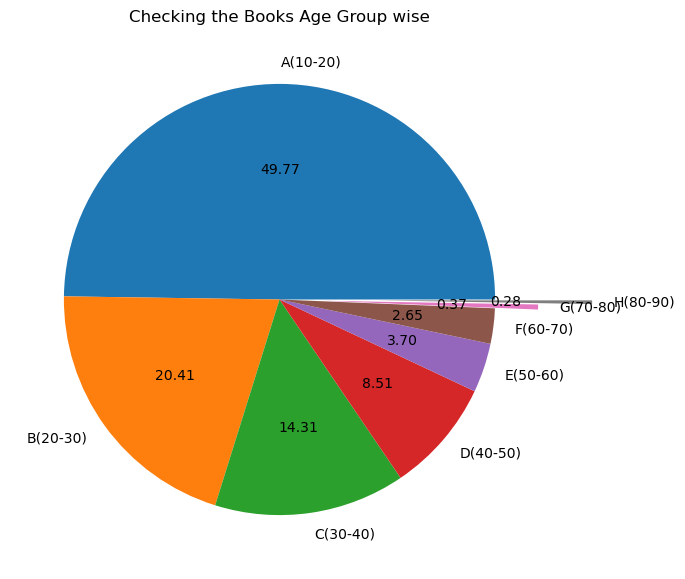

In [125]:
# Visualising the Books Age group wise
plt.figure(figsize=(14,7))
plt.pie(df['Age_group'].value_counts(), labels=['A(10-20)','B(20-30)','C(30-40)','D(40-50)','E(50-60)','F(60-70)','G(70-80)','H(80-90)'], 
        autopct='%0.2f', explode=[0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.20,0.45])
plt.title('Checking the Books Age Group wise')
plt.show()

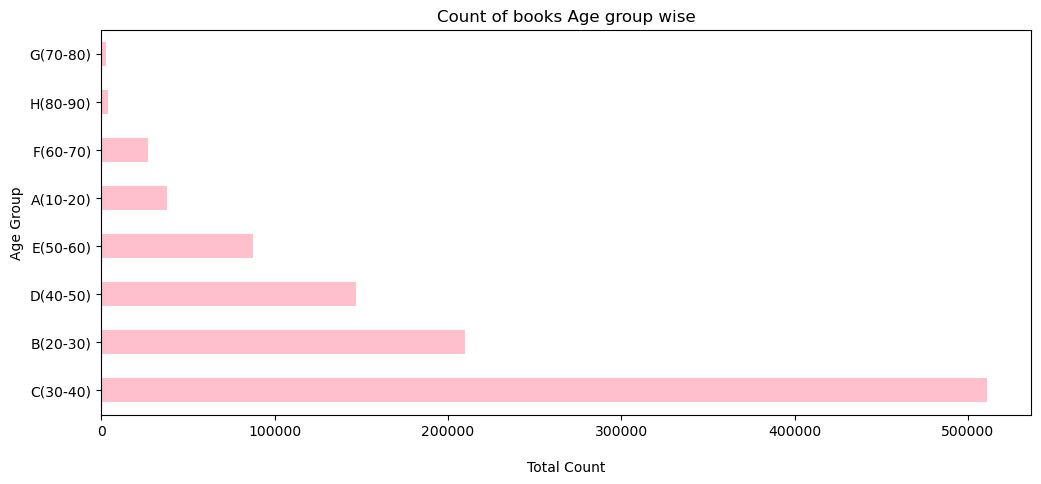

In [126]:
# Visualising the count of books age group wise
plt.figure(figsize=(12,5))
df['Age_group'].value_counts().plot(kind='barh', color='pink')
plt.title('Count of books Age group wise')
plt.xlabel('\nTotal Count')
plt.ylabel('Age Group')
plt.show()

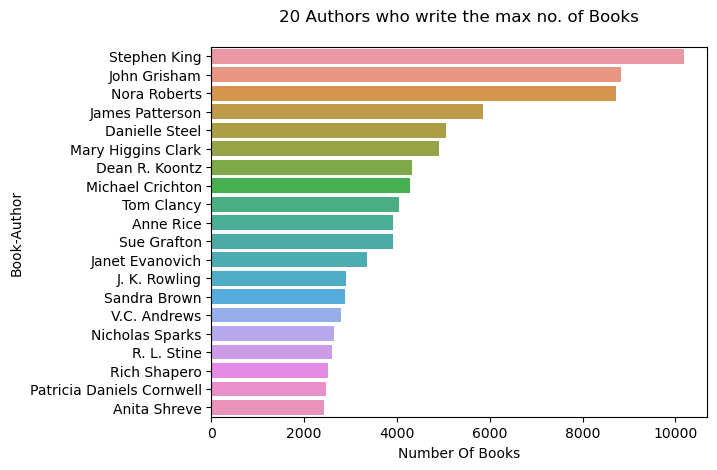

In [127]:
# Checking the Top 20 Authors who published max no. of books
plt.figure()
sns.countplot(y="Book-Author", data=df, order=df['Book-Author'].value_counts().index[0:20])
plt.title("20 Authors who write the max no. of Books\n")
plt.xlabel("Number Of Books")
plt.show()

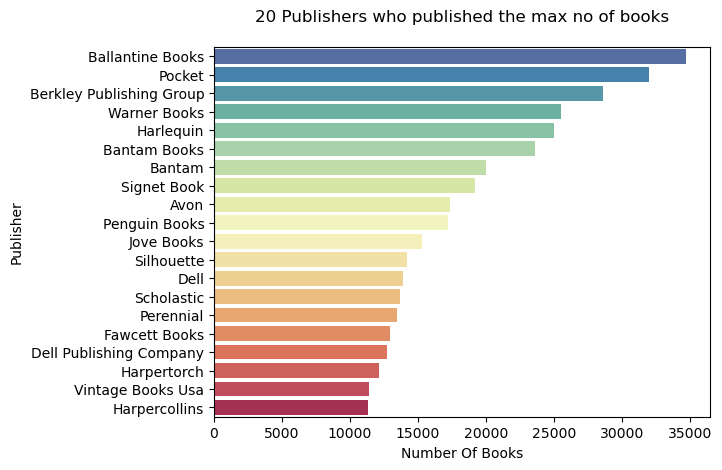

In [128]:
# Checking the Top 20 Publishers 
plt.figure()
sns.countplot(y="Publisher", data=df, order=df['Publisher'].value_counts().index[0:20], palette='Spectral_r')
plt.title("20 Publishers who published the max no of books\n")
plt.xlabel("Number Of Books")
plt.show()

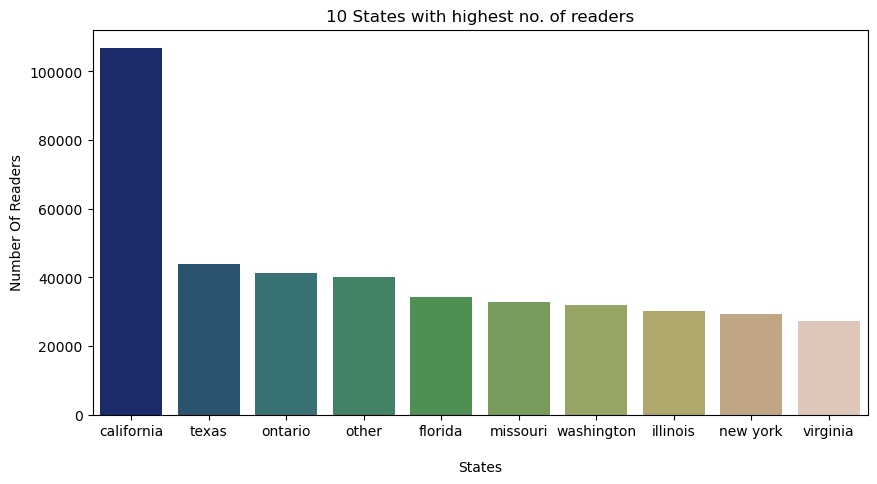

In [129]:
# Checking the 10 States with highest readers
plt.figure(figsize=(10,5))
sns.countplot(x="State", data=df, order=df['State'].value_counts().index[0:10], palette='gist_earth')
plt.title("10 States with highest no. of readers")
plt.ylabel("Number Of Readers")
plt.xlabel("\nStates")
plt.show()

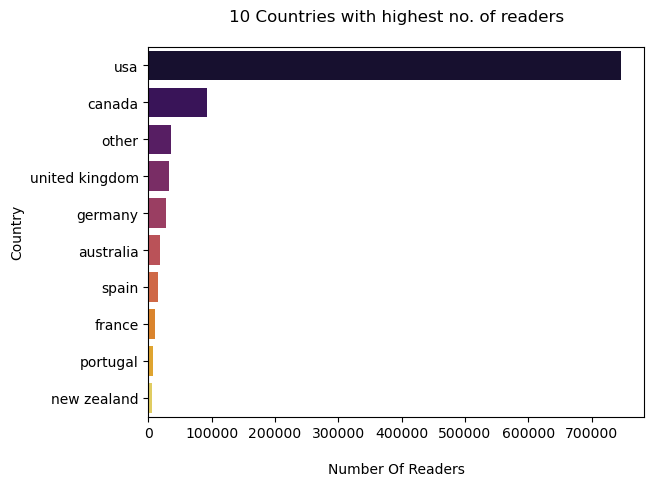

In [130]:
# Checking the 10 Countries with highest readers
plt.figure()
sns.countplot(y="Country", data=df, order=df['Country'].value_counts().index[0:10], palette='inferno')
plt.title("10 Countries with highest no. of readers\n")
plt.xlabel("\nNumber Of Readers")
plt.show()

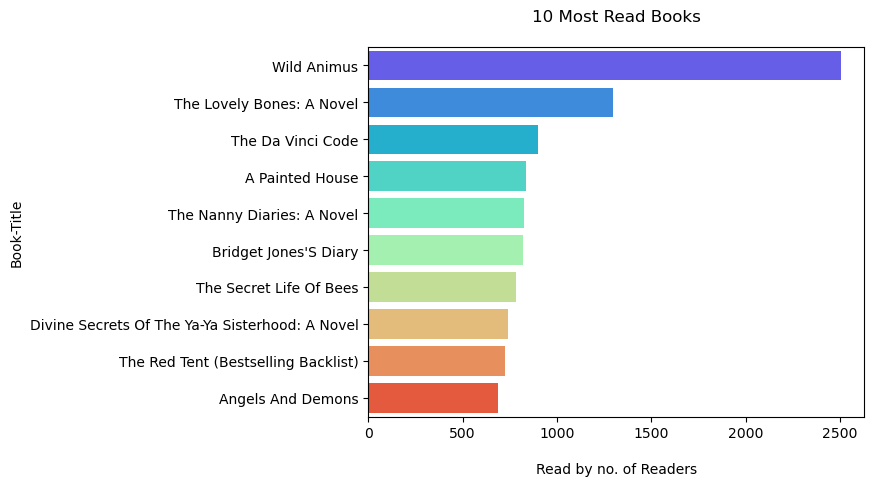

In [131]:
# Checking the most readed books
plt.figure()
sns.countplot(y="Book-Title", data=df, order=df['Book-Title'].value_counts().index[0:10], palette='rainbow')
plt.xlabel("\nRead by no. of Readers");
plt.title("10 Most Read Books\n")
plt.show()

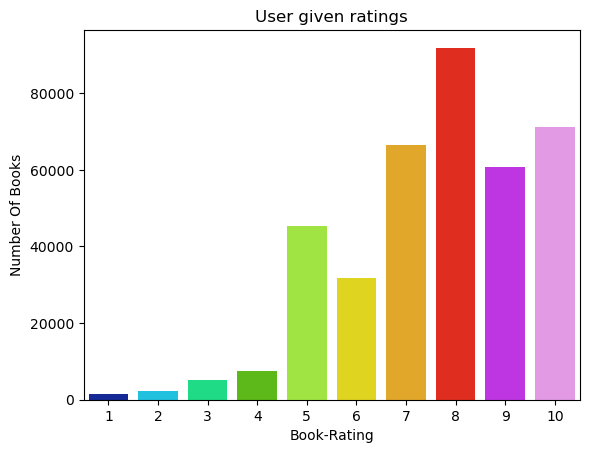

In [132]:
# Chceking the Ratings given by users who read book 
plt.figure()
data = df[df['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data, palette='gist_ncar')
plt.title("User given ratings")
plt.ylabel("Number Of Books")
plt.show()

In [133]:
# Retrieving the explicit ratings given by user
explicit_ratings = df[df['Book-Rating']>0]
explicit_ratings.shape

(384074, 14)

In [134]:
# Computing the count of a book rated
num_rating_df = explicit_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)

In [135]:
# Computing the average of particular book rated
avg_rating_df = explicit_ratings.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)

In [136]:
# Merging the above dataframe
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')

In [137]:
# Merging the other columns into dataframe
popular_df = popular_df.merge(explicit_ratings, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title',
                                                                                    'Book-Author',
                                                                                    'Year-Of-Publication',
                                                                                    'Publisher',
                                                                                    'num_ratings',
                                                                                    'avg_rating',
                                                                                     'Country',
                                                                                     'Age_group',
                                                                                     'User-ID',
                                                                                     'ISBN'           
                                                                                     ]]

In [138]:
# Retrieving the 50 popular books which is highest avg. rated
a = popular_df[(popular_df['num_ratings']>150) & (popular_df['avg_rating']>7)].sort_values('avg_rating', ascending=False)
a[['Book-Title', 'avg_rating', 'Country', 'Age_group']].head(50)

,Book-Title,avg_rating,Country,Age_group
124025,Harry Potter And The Goblet Of Fire (Book 4),9.125506,other,C(30-40)
124796,Harry Potter And The Sorcerer'S Stone (Book 1),9.062500,other,C(30-40)
124277,Harry Potter And The Order Of The Phoenix (Boo...,9.047393,usa,D(40-50)
124501,Harry Potter And The Prisoner Of Azkaban (Book 3),9.043321,other,C(30-40)
352842,To Kill A Mockingbird,8.977528,other,C(30-40)
124974,Harry Potter And The Sorcerer'S Stone (Harry P...,8.936508,other,C(30-40)
94236,Ender'S Game (Ender Wiggins Saga (Paperback)),8.920530,other,C(30-40)
289810,The Fellowship Of The Ring (The Lord Of The Ri...,8.882927,other,C(30-40)
123667,Harry Potter And The Chamber Of Secrets (Book 2),8.840491,other,C(30-40)
299184,The Hobbit : The Enchanting Prelude To The Lor...,8.739130,usa,E(50-60)


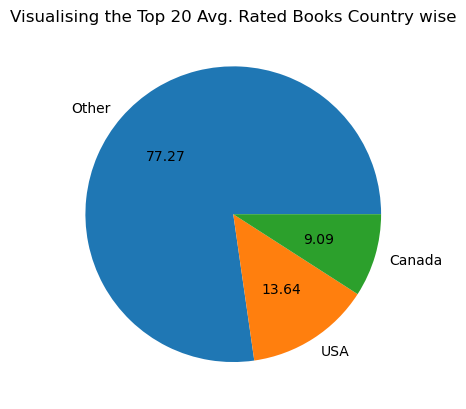

In [139]:
# Visualising the Top 50 Avg. Rated Books Country wise
plt.pie(a['Country'].value_counts().head(20),labels=['Other','USA','Canada'],autopct='%0.2f')
plt.title('Visualising the Top 20 Avg. Rated Books Country wise')
plt.show()

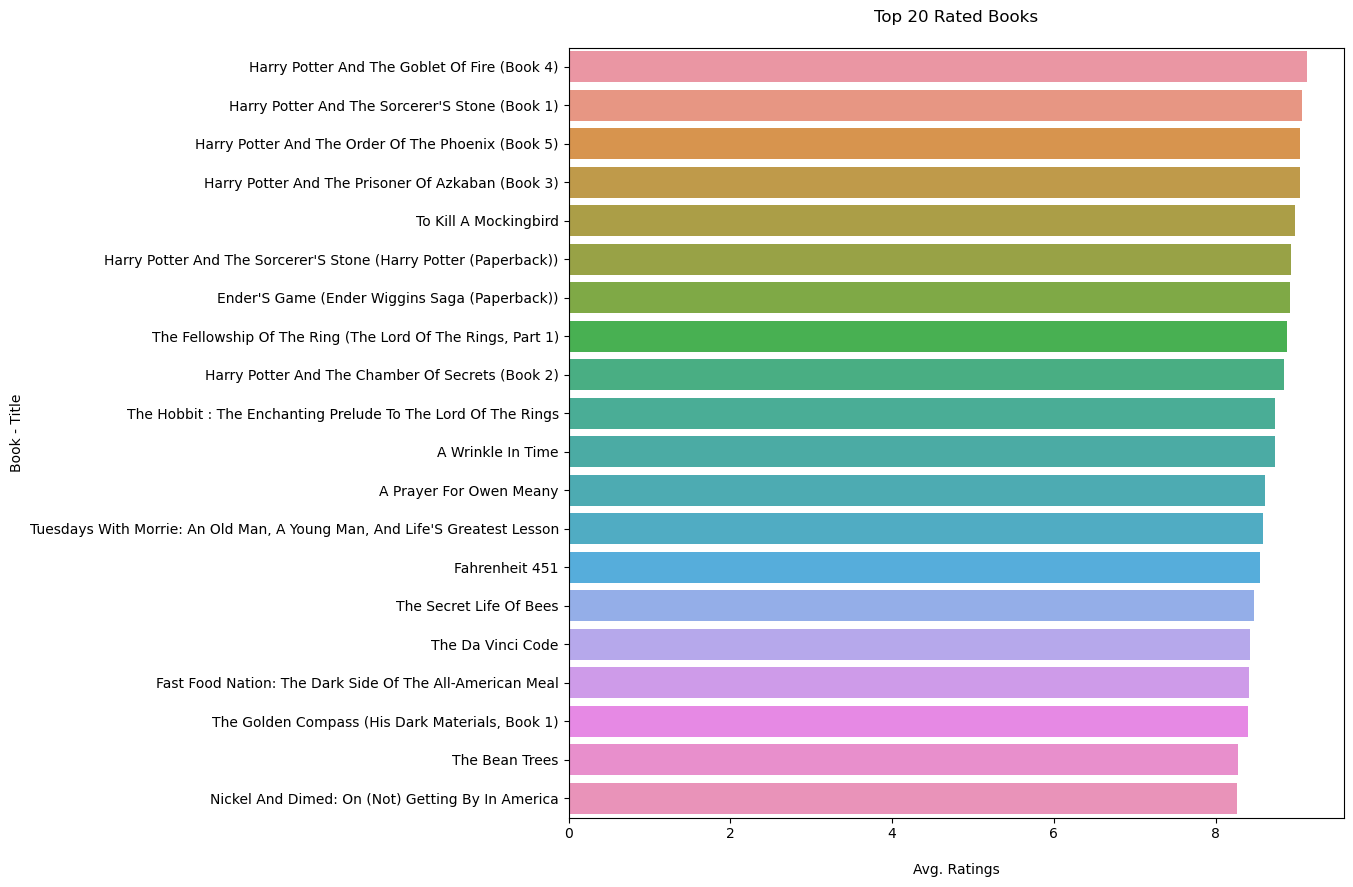

In [140]:
# Visualising the Top 20 rated books
plt.figure(figsize=(10,10))
sns.barplot(x=a['avg_rating'].head(20),y=a['Book-Title'].head(20))
plt.title('Top 20 Rated Books\n')
plt.xlabel('\nAvg. Ratings')
plt.ylabel('Book - Title')
plt.show()

In [141]:
# Computing the Top 20 avg. rated books according to the author
b = popular_df[(popular_df['num_ratings']>150) & (popular_df['avg_rating']>7)]
b = b.groupby('Book-Author').mean()['avg_rating'].reset_index().sort_values('avg_rating', ascending=False)
b[['Book-Author', 'avg_rating']].head(20)

,Book-Author,avg_rating
22,J. K. Rowling,9.009287
20,Harper Lee,8.977528
40,Orson Scott Card,8.920530
23,J. R. R. Tolkien,8.882927
25,J.R.R. Tolkien,8.739130
33,Madeleine L'Engle,8.734463
30,John Irving,8.615385
42,Ray Bradbury,8.549020
48,Sue Monk Kidd,8.479419
18,Eric Schlosser,8.415584


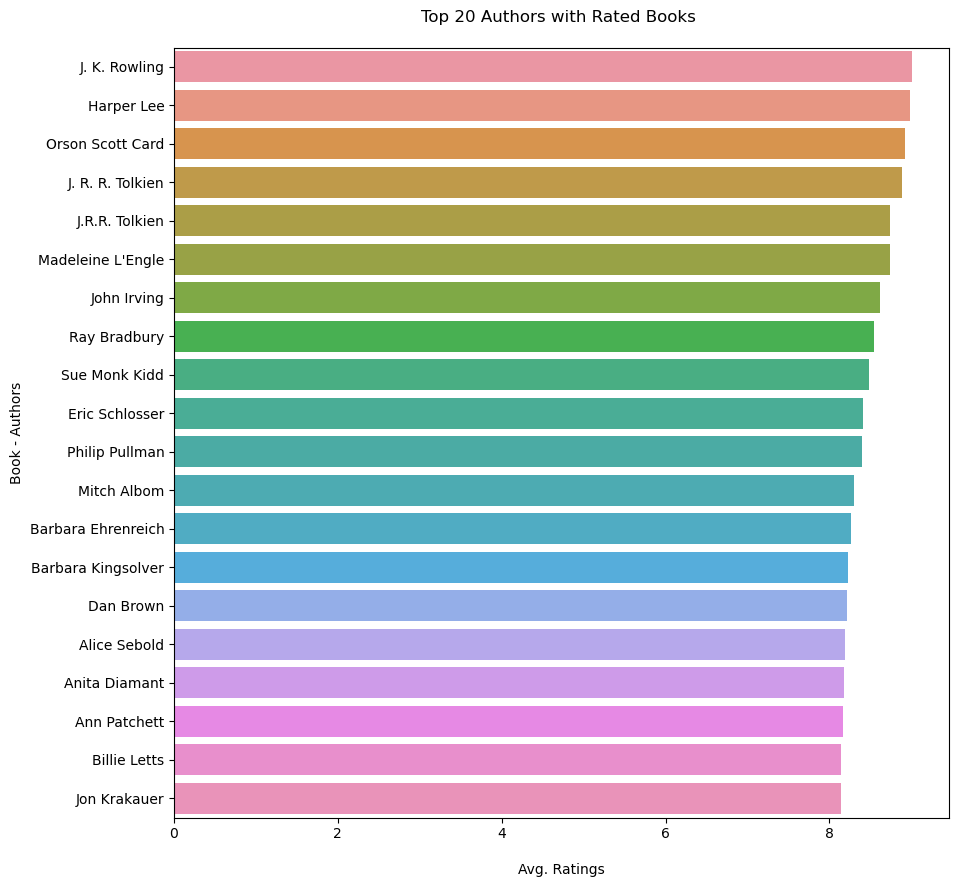

In [142]:
# Visualising the Top 20 avg. rated books - authors
plt.figure(figsize=(10,10))
sns.barplot(x=b['avg_rating'].head(20),y=b['Book-Author'].head(20))
plt.title('Top 20 Authors with Rated Books \n')
plt.xlabel('\nAvg. Ratings')
plt.ylabel('Book - Authors')
plt.show()

In [143]:
# Computing the Top 30 publishers with thr Avg. of Year Publication
s = explicit_ratings.Publisher.value_counts().head(30).reset_index()
r = explicit_ratings.groupby('Publisher').median()['Year-Of-Publication'].reset_index()
s.rename({'index':'Publisher', 'Publisher':'Book_Published'}, axis=1, inplace=True)
t = s.merge(r, on='Publisher') 
t

,Publisher,Book_Published,Year-Of-Publication
0,Ballantine Books,12785,1996.0
1,Pocket,10569,1997.0
2,Berkley Publishing Group,9322,1999.0
3,Warner Books,9033,1997.0
4,Bantam,7385,1994.0
5,Bantam Books,7306,1994.0
6,Penguin Books,7096,1996.0
7,Signet Book,6776,1998.0
8,Perennial,5778,1998.0
9,Avon,5565,1998.0


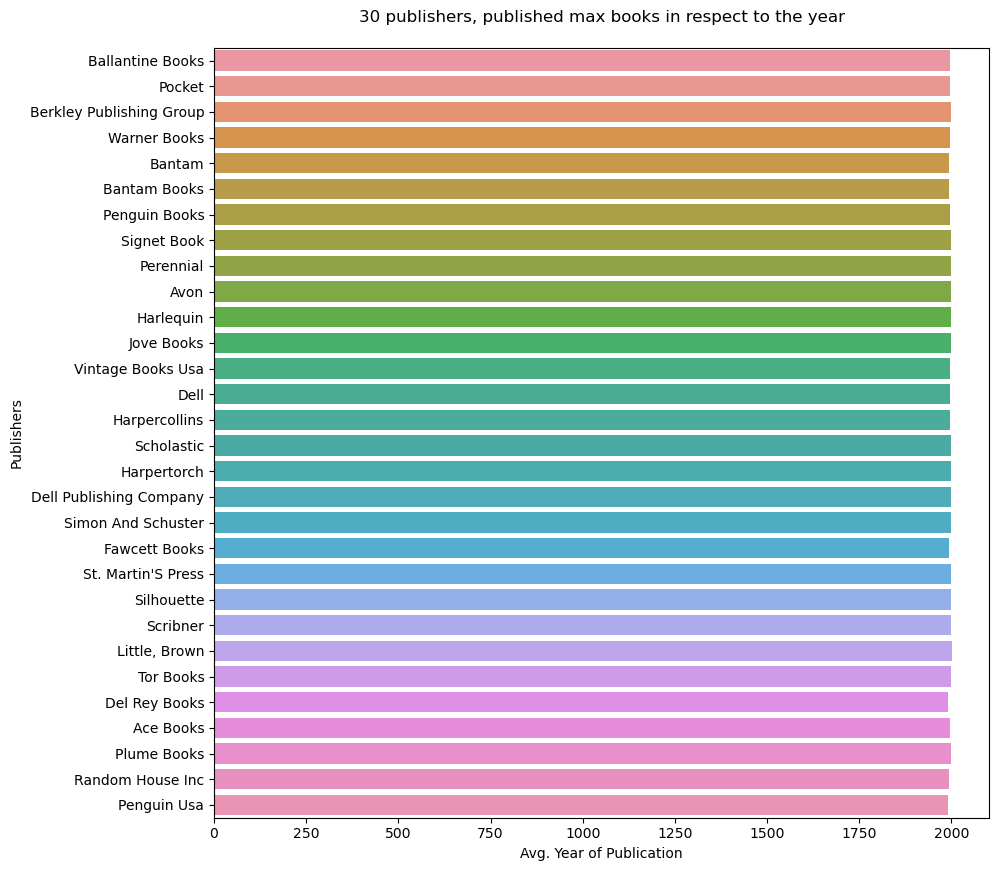

In [144]:
# Visualising the Top 30 publishers with respect to the Avg. of Year Publication
plt.figure(figsize=(10,10))
sns.barplot(x=t['Year-Of-Publication'], y=t['Publisher'])
plt.title('30 publishers, published max books in respect to the year\n')
plt.xlabel('Avg. Year of Publication')
plt.ylabel('Publishers')
plt.show()

In [145]:
# Retrieving the popular books which is highest avg. rated (>7) in usa
usa = explicit_ratings[(explicit_ratings['Country']=='usa') & (explicit_ratings['Book-Rating']>7)].sort_values('Book-Rating', ascending=False)
usa = usa[['User-ID', 'Book-Title', 'Book-Rating', 'Country']]
usa

,User-ID,Book-Title,Book-Rating,Country
615274,174918,The Millionaires,10,usa
947252,243851,Cat And Mouse,10,usa
861519,83754,Cloth Of Heaven (Song Of Erin #1),10,usa
947247,78603,Cat And Mouse,10,usa
861520,83754,"Angel Of Mercy (Shannon Saga, 3)",10,usa
...,...,...,...,...
615409,181687,The Brethren,8,usa
615402,181687,Rachel'S Holiday,8,usa
615372,181687,The Five People You Meet In Heaven,8,usa
615369,179688,The Gorilla Game : An Investor'S Guide To Pick...,8,usa


In [146]:
# Checking a particular read by users in usa
usa[usa['Book-Title']=='The Millionaires']

,User-ID,Book-Title,Book-Rating,Country
615274,174918,The Millionaires,10,usa
513329,156467,The Millionaires,10,usa
881294,150316,The Millionaires,10,usa
774729,221705,The Millionaires,10,usa
825083,85833,The Millionaires,10,usa
741189,224626,The Millionaires,10,usa
722486,86368,The Millionaires,9,usa
305899,170947,The Millionaires,9,usa
967693,212771,The Millionaires,9,usa
967686,49278,The Millionaires,9,usa


In [147]:
# Retrieving the average rating of a particular book read by multiple users in usa
f = usa.groupby('Book-Title').mean('Book-Rating').reset_index()
f['Country'] = 'usa'
f['User-ID'] = f['User-ID'].astype('int64')
f['Book-Rating'] = f['Book-Rating'].round(2)
f

,Book-Title,User-ID,Book-Rating,Country
0,A Light In The Storm: The Civil War Diary Of ...,96448,9.00,usa
1,"Ask Lily (Young Women Of Faith: Lily Series, ...",269557,8.00,usa
2,Dark Justice,98391,10.00,usa
3,Earth Prayers From Around The World: 365 Pray...,100548,9.67,usa
4,Final Fantasy Anthology: Official Strategy Gu...,65961,10.00,usa
...,...,...,...,...
62962,\Why Are All The Black Kids Sitting Together I...,52917,9.00,usa
62963,"\Why Do We Gotta Do This Stuff, Mr. Nehring?\""...",52584,8.00,usa
62964,"\You'Ll Never Nanny In This Town Again!\"": The...",69538,9.00,usa
62965,"\You'Re Okay, It'S Just A Bruise\"": A Doctor'S...",57311,10.00,usa


In [148]:
# Checking the average rating of a particular book
f[f['Book-Title']=='The Millionaires']

,Book-Title,User-ID,Book-Rating,Country
51219,The Millionaires,160373,8.9,usa


In [149]:
# Retrieving the popular books which is highest avg. rated (>7) in canada
can = explicit_ratings[(explicit_ratings['Country']=='canada') & (explicit_ratings['Book-Rating']>7)].sort_values('Book-Rating', ascending=False)
can = can[['User-ID', 'Book-Title', 'Book-Rating', 'Country']]
can

,User-ID,Book-Title,Book-Rating,Country
804013,135277,What'S A Girl Gotta Do,10,canada
661785,174405,Crow Lake (Today Show Book Club #7),10,canada
321532,189334,Friendship: Celebration Of Humanity (M.I.L.K.),10,canada
321531,189334,Love: A Celebration Of Humanity (M.I.L.K.),10,canada
321529,189334,Endangered Species: Portraits Of A Dying Mille...,10,canada
...,...,...,...,...
767840,270629,Nova Scotia: Shaped By The Sea : A Living History,8,canada
387180,69967,Fever Pitch,8,canada
387179,69967,Airframe,8,canada
386124,51165,Disclosure,8,canada


In [150]:
# Checking a particular read by users in canada
can[can['Book-Title']=="What'S A Girl Gotta Do"]

,User-ID,Book-Title,Book-Rating,Country
804013,135277,What'S A Girl Gotta Do,10,canada
793836,274199,What'S A Girl Gotta Do,9,canada


In [151]:
# Retrieving the average rating of a particular book read by multiple users in canada
g = can.groupby('Book-Title').mean('Book-Rating').reset_index()
g['Country'] = 'canada'
g['User-ID'] = g['User-ID'].astype('int64')
g['Book-Rating'] = g['Book-Rating'].round(2)
g

,Book-Title,User-ID,Book-Rating,Country
0,"Q-Space (Star Trek The Next Generation, Book 47)",270713,8.0,canada
1,'Salem'S Lot,98426,10.0,canada
2,...And Ladies Of The Club,59172,10.0,canada
3,"1,000 Marbles: A Little Something About Precio...",130396,10.0,canada
4,10 Minute Guide To Html 4.0 (Ten Minute Guide ...,223034,8.0,canada
...,...,...,...,...
13248,"\Surely You'Re Joking, Mr. Feynman!\"": Adventu...",151286,9.5,canada
13249,"\There I Was ... Flat On My Back\""""",79441,9.0,canada
13250,"\Until You Are Dead\"" : Steven Truscott'S Long...",191881,8.0,canada
13251,"\What Do You Care What Other People Think?\"": ...",204782,8.0,canada


In [152]:
# Checking the average rating of a particular book
g[g['Book-Title']=="What'S A Girl Gotta Do"]

,Book-Title,User-ID,Book-Rating,Country
12764,What'S A Girl Gotta Do,204738,9.5,canada


In [153]:
# Final Merging to check the 50 popular book read in both the countries
h = f.merge(g, on='Book-Title', how='inner')
h.head(50)

,Book-Title,User-ID_x,Book-Rating_x,Country_x,User-ID_y,Book-Rating_y,Country_y
0,"Q-Space (Star Trek The Next Generation, Book 47)",204601,10.00,usa,270713,8.00,canada
1,'Salem'S Lot,174615,9.10,usa,98426,10.00,canada
2,"10,000 Things To Praise God For",7346,8.00,usa,191575,9.00,canada
3,101 Famous Poems,127171,10.00,usa,245371,8.00,canada
4,101 Poems Against War,43713,8.00,usa,110076,8.00,canada
5,12 Simple Secrets Of Happiness: Finding Joy In...,228372,8.00,usa,148258,8.00,canada
6,"14,000 Things To Be Happy About",81327,9.60,usa,85526,8.00,canada
7,15 Minute Family Traditions And Memories,141857,8.00,usa,191575,10.00,canada
8,159 Celtic Designs (Dover Pictorial Archive),123056,9.00,usa,250683,9.00,canada
9,1632 (Assiti Shards (Paperback)),142529,9.00,usa,199795,8.00,canada


In [154]:
h.shape

(7039, 7)

# Building Recommendation Engine

Popularity based

Collaborative Filtering based

# Popularity Based:
    Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

# Top Popular books based on Ratings:
    We will build a recommendation system based on highest average top rated books read by user.
    The recommendation intelligence is based on the readers who have read & rated atleast 100 books and that particular book should be rated by 50 different users.

In [155]:
# Filtering the dataset
pop_rat = explicit_ratings[explicit_ratings['Book-Rating']>=7]
pop_rat.shape

(290391, 14)

In [156]:
# Merging the books & ratings
books_with_rating = rating.merge(books,on='ISBN')

In [157]:
# Checking the merged dataset
books_with_rating.shape

(1031609, 9)

In [158]:
# Renaming the dataset
num_rating_df = pop_rat.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df.shape

(107132, 2)

In [159]:
# Retrieving the average ratings from merged dataset 
avg_rating_df = pop_rat.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True) 
avg_rating_df.shape

(107132, 2)

In [160]:
# Merging the Books, No. of Ratings & Avg. Ratings into one dataframe
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df.shape

(107132, 3)

In [161]:
# Filtering the dataset by popularity given our condition
popular_df = popular_df[popular_df['num_ratings']>=100].sort_values('avg_rating',ascending=False)
popular_df.shape

(143, 3)

In [162]:
# Checking the shape of popularity dataframe
popular_df

,Book-Title,num_ratings,avg_rating
91235,"The Return Of The King (The Lord Of The Rings,...",112,9.553571
94531,"The Two Towers (The Lord Of The Rings, Part 2)",132,9.446970
35615,Harry Potter And The Goblet Of Fire (Book 4),233,9.351931
35635,Harry Potter And The Sorcerer'S Stone (Book 1),165,9.321212
82711,The Fellowship Of The Ring (The Lord Of The Ri...,185,9.308108
...,...,...,...
38024,House Of Sand And Fog,181,8.127072
39622,Icy Sparks,103,8.106796
83628,The Girls' Guide To Hunting And Fishing,164,7.993902
103844,While I Was Gone,104,7.961538


In [163]:
# Retrieving the other information about the book & dropping the duplicates if any
popular_df = popular_df.merge(pop_rat, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title',
                                                                                    'Book-Author',
                                                                                    'Year-Of-Publication',
                                                                                    'Publisher',
                                                                                    'Book-Rating',            
                                                                                    'Country',
                                                                                    'Image-URL-M', 
                                                                                     'avg_rating',
                                                                                    'num_ratings'      
                                                                                     ]]

In [164]:
# Reviewing the merged dataframe
popular_df.shape

(143, 9)

In [165]:
# Defining a function to load images
def path_to_image_html(path):
    return '<img src="'+ path + '" >'

def pop_load_Image(df):
     return HTML(df[['Image-URL-M', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Book-Rating', 'Country', 'avg_rating']].to_html(formatters={'Image-URL-M': path_to_image_html}, escape=False))
    
def load_DF(df):
    return HTML(df[['Image-URL-M', 'Book-Title', 'Book-Author','Year-Of-Publication','Publisher', 'Book-Rating', 'Country', 'avg_rating', 'num_ratings']].to_html(formatters={'Image-URL-M': path_to_image_html}, escape=False))

In [166]:
# Top n popular books recommendation model - Rating wise (Max - 200 books)
n = int(input("Enter number of books to recommend: "))

if n>200:
    print("\nOops, we have top 200 popular books which is read by bibliophile users with highest avg. rated")
    d = popular_df[popular_df['num_ratings']>=100].sort_values('avg_rating',ascending=False).head(200)
    print('\n\033[1m' + 'Top', 200, 'Popular Books: \n' + '\033[0m')
    pop_result = pop_load_Image(d)
    
else:
    h = popular_df[popular_df['num_ratings']>=100].sort_values('avg_rating',ascending=False).head(n)
    print('\n\033[1m' + 'Top', n, 'Popular Books: \n' + '\033[0m')
    pop_result = pop_load_Image(h)

pop_result

Enter number of books to recommend: 5

Top 5 Popular Books: 



,Image-URL-M,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Rating,Country,avg_rating
0,,"The Return Of The King (The Lord Of The Rings, Part 3)",J. R. R. Tolkien,1988,Houghton Mifflin,10,other,9.553571
112,,"The Two Towers (The Lord Of The Rings, Part 2)",J. R. R. Tolkien,1988,Houghton Mifflin,10,other,9.446970
244,,Harry Potter And The Goblet Of Fire (Book 4),J. K. Rowling,2000,Scholastic,8,other,9.351931
477,,Harry Potter And The Sorcerer'S Stone (Book 1),J. K. Rowling,1998,Scholastic,8,other,9.321212
642,,"The Fellowship Of The Ring (The Lord Of The Rings, Part 1)",J. R. R. Tolkien,1999,Houghton Mifflin Company,8,other,9.308108


# Top Popular books based on Location:
    We will build a recommendation system based on highest top rated books read by users in a given location.
    The recommendation intelligence is based on the readers who have read & rated a book with score of more than 7 for a given location.

In [167]:
# Defining another function for popularity  
def popularity_based(dataframe, n):
    if n >= 1 and n <= len(dataframe):
        data = pd.DataFrame(dataframe.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating', ascending=False).head(n)
        result = pd.merge(data, books, on='ISBN')            
        return result

In [168]:
# Defining a function for location wise filter
def search_unique_places(dataframe, country,state,city):
    country = country.lower()
    state = state.lower()
    city = city.lower()
    if country  and state  and city :
        return dataframe[(dataframe['Country'] == country) & (dataframe['State'] == state) & (dataframe['City'] == city)]
    else:
        if (country and state) or (country  and city ) or (state and city):
            if (country  and state):
                return dataframe[(dataframe['Country'] == country) & (dataframe['State'] == state)]
            elif (country and city ):
                return dataframe[(dataframe['Country'] == country) & (dataframe['City'] == city)]
            else:
                return dataframe[(dataframe['State'] == state) & (dataframe['City'] == city)]
                                 
        else:
            if city in list(dataframe['City'].unique()):
                return dataframe[dataframe['City'] == city]
            elif state in list(dataframe['State'].unique()):
                return dataframe[dataframe['State'] == state]
            elif country in list(dataframe['Country'].unique()):
                return dataframe[dataframe['Country'] == country]
            else:
                return []

In [169]:
# Defining a function to load images
def path_to_image_html(path):
    return '<img src="'+ path + '" >'

def load_Image(df):
     return HTML(df[['Book-Title','Image-URL-M']].to_html(formatters={'Image-URL-M': path_to_image_html}, escape=False))
    
def DF_load(df):
    return HTML(df[['Book-Title', 'Book-Author','Year-Of-Publication','Publisher','Image-URL-M', 'Book-Rating','Country', 'State', 'City']].to_html(formatters={'Image-URL-M': path_to_image_html}, escape=False))

In [170]:
expr = df[(df['Book-Rating']!=0) & (df['Book-Rating']>7)]
expr.shape

(223958, 14)

In [172]:
#Top n popular books recommendation model- Location wise (Max - 100 books)
number = int(input("Enter number of books to recommend: "))
country = input("Enter the name of Country: ")
state = input("Enter the name of State: ")
city = input("Enter the name of City: ")

data = search_unique_places(expr,country,state,city)

#n = int(input("Enter number of books to recommend: "))

if number>100:
    print("\nOops, we have top 100 popular books which is read by bibliophile users with highest rated")
    p = data[data['Book-Rating']>7].sort_values('Book-Rating',ascending=False).head(100)
    print('\n\033[1m' + 'Top', 100, 'Popular Books: \n' + '\033[0m')
    result = DF_load(shuffle(p))
    
else:
    e = data[data['Book-Rating']>7].sort_values('Book-Rating',ascending=False).head(number)
    print('\n\033[1m' + 'Top', number, 'Popular Books: \n' + '\033[0m')
    result = DF_load(shuffle(e))

result

Enter number of books to recommend: 5
Enter the name of Country: canada
Enter the name of State: 
Enter the name of City: 

Top 5 Popular Books: 



,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Book-Rating,Country,State,City
321531,Love: A Celebration Of Humanity (M.I.L.K.),Milk Project,2001,William Morrow,,10,canada,ontario,ottawa
321529,Endangered Species: Portraits Of A Dying Millenium,Dierdre Luzwick,1992,Harper San Francisco,,10,canada,ontario,ottawa
321532,Friendship: Celebration Of Humanity (M.I.L.K.),Milk Project,2001,William Morrow,,10,canada,ontario,ottawa
804013,What'S A Girl Gotta Do,Sparkle Hayter,1995,Penguin Books,,10,canada,quebec,montreal
661785,Crow Lake (Today Show Book Club #7),Mary Lawson,2003,Delta,,10,canada,ontario,waterloo


# Collaborative Filtering based:
    Collaborative filtering is a technique commonly used to build personalized recommendations. It is based on gathering and analyzing data on user’s behavior.
    In Collaborative filtering, we tend to find similar users /items and recommend what similar users like. This includes the user’s online activities and predicting what they will like based on the similarity with other users.

# Item based filtering:
    Here we find a similarity matrix of items, here we find a similarity between the two items.
    We have build a recommendation system based on top users read atleast 150 books, and such particular book is rated by atleast 50 different users as well with help of cosine similarity matrix.
    We will build another model using nearest neighbours with a criteria of a particular book rated more than 50.

Using Cosine Similarity Matrix for Item based filtering

In [173]:
# Retrieving the users who read & rated more than 150 books
x = df.groupby('User-ID').count()['Book-Rating'] >= 150
Experienced_readers = x[x].index
Experienced_readers.shape

(1123,)

In [174]:
# Filtering the dataset by users who read more than 150 books
filtered_rating = df[df['User-ID'].isin(Experienced_readers)]
filtered_rating.shape

(528086, 14)

In [175]:
# Filtering the dataset by books which is rated by atleast 50 users
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index
famous_books.shape

(892,)

In [176]:
# Checking the shape of collaborative based dataframe
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings.shape

(77614, 14)

In [177]:
# Converting the dataframe into pivot table
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [178]:
# Filling the Nans with 0
pt.fillna(0,inplace=True)

In [179]:
# Reviewing the Pivot Table
pt

User-ID,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1St To Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2Nd Chance,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year Of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen And The Art Of Motorcycle Maintenance: An Inquiry Into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
# Calculating the similarity scores
similarity_scores = cosine_similarity(pt)

In [181]:
# The similarity score of similar books
similarity_scores.shape

(892, 892)

In [182]:
# Defining a function to display filtered results
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:9]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = df[df['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        #item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-L'].values))
        
        data.append(item)
    
    return data

In [183]:
# Testing the function 
recommend('The Reader')

[['Drowning Ruth', 'Christina Schwarz'],
 ['Jewel', 'Bret Lott'],
 ["Songs In Ordinary Time (Oprah'S Book Club (Paperback))",
  'Mary Mcgarry Morris'],
 ['A Lesson Before Dying (Vintage Contemporaries (Paperback))',
  'Ernest J. Gaines'],
 ['River, Cross My Heart', 'Breena Clarke'],
 ["Vinegar Hill (Oprah'S Book Club (Paperback))", 'A. Manette Ansay'],
 ['The Virgin Suicides', 'Jeffrey Eugenides'],
 ['The Red Tent (Bestselling Backlist)', 'Anita Diamant']]

In [184]:
# Reviewing the function
book_name = 'The Reader'
index = np.where(pt.index==book_name)[0][0]
similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:9]
similar_items

[(194, 0.30270554408537026),
 (339, 0.29435749247732107),
 (560, 0.2910592870405838),
 (17, 0.27605516305706307),
 (502, 0.26070815937526054),
 (843, 0.25013073906961214),
 (803, 0.24758298080046764),
 (754, 0.24743163310540012)]

In [185]:
# Checking the index value of pivot table
pt.index[339]

'Jewel'

Using Nearest Neighbours Model for Item based filtering

In [186]:
# Filtering the data & considering only those books which are read & rated by 50 users
data = (df.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().
        rename(columns = {'Book-Rating': 'Total-Rating'})[['Book-Title', 'Total-Rating']])

result = pd.merge(data, df1, on='Book-Title', how="left")
result = result[result['Total-Rating'] >= 50]
result = result.reset_index(drop = True)

matrix = result.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
up_matrix = csr_matrix(matrix)

In [187]:
# Building the nearest neighbours model for the data
bookName = input("Enter a book name: ")
number = 8

model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(up_matrix)

distances, indices = model.kneighbors(matrix.loc[bookName].values.reshape(1, -1), n_neighbors = number+1)
print("\nRecommended books:\n")

rec_books = []
for i in range(0, len(distances.flatten())):
    if i > 0:
        rec_books.append(matrix.index[indices.flatten()[i]]) 

nearest_neighbours_based = pd.DataFrame(
                    {'Book-Title': rec_books
                    }
                )
nearest_neighbours_based

Enter a book name: Jewel

Recommended books:



,Book-Title
0,"River, Cross My Heart"
1,Object Lessons
2,Icy Sparks
3,The Bluest Eye
4,Drowning Ruth
5,I Know This Much Is True
6,"Breath, Eyes, Memory"
7,The Poisonwood Bible: A Novel


# Note:
    From above analysis, only two books were found common for the searched book results.
    Cosine Similarity Matrix found to be more accurate compared to Nearest Neighbours model's item based filtering.
    We reviewed the both the models based on genre of book recommendation on Internet.
    We will go ahead and build the user - user based collaborative filtering model for the dataset.

# User - User based Collaborative Filtering:
    User-User collaborative filtering is one kind of recommendation method which looks for similar users based on the items users have already liked or positively interacted with.

Using Pearson's Correlation Similarity Matrix

In [188]:
# Filtering the dataset and including rating based on below condition 
custm = df

print('Unique Ratings :', sorted(custm['Book-Rating'].unique()),'\n')

print('Shape of custm :', custm.shape)

Unique Ratings : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

Shape of custm : (1031609, 14)


In [189]:
# Retrieving the users who read & rated more than 150 books
x = custm.groupby('User-ID').count()['Book-Rating'] >= 150
Experienced_users = x[x].index
Experienced_users.shape

(1123,)

In [190]:
# Filtering the dataset by users who read more than 50 books
filtered_rating = custm[custm['User-ID'].isin(Experienced_users)]
filtered_rating.shape

(528086, 14)

In [191]:
# Filtering the dataset by books which is rated by atleast 50 users
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
fam_books = y[y].index
fam_books.shape

(892,)

In [192]:
# Checking the shape of collaborative based dataframe
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(fam_books)]
final_ratings.shape

(77614, 14)

In [193]:
# Summarising the above filtered dataset
## Number of users
print('The final dataset has', final_ratings['User-ID'].nunique(), 'unique users\n')

## Number of books
print('The final dataset has', final_ratings['Book-Title'].nunique(), 'unique books\n')

## Number of ratings
print('The final dataset has', final_ratings['Book-Rating'].nunique(), 'unique ratings\n')

## List of unique ratings
print('The unique ratings in final dataset are :', sorted(final_ratings['Book-Rating'].unique()))

The final dataset has 1117 unique users

The final dataset has 892 unique books

The final dataset has 11 unique ratings

The unique ratings in final dataset are : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [194]:
# Converting the dataframe into pivot table
pt = final_ratings.pivot_table(index='User-ID',columns='Book-Title',values='Book-Rating')

In [195]:
pt

Book-Title,1984,1St To Die: A Novel,2Nd Chance,4 Blondes,84 Charing Cross Road,A Beautiful Mind: The Life Of Mathematical Genius And Nobel Laureate John Nash,A Bend In The Road,A Case Of Need,"A Child Called \It\"": One Child'S Courage To Survive""",A Civil Action,...,"Wizard And Glass (The Dark Tower, Book 4)",Wld Accordng Garp,Women Who Run With The Wolves,"Word Freak: Heartbreak, Triumph, Genius, And Obsession In The World Of Competitive Scrabble Players",Wuthering Heights,Year Of Wonders,You Belong To Me,Zen And The Art Of Motorcycle Maintenance: An Inquiry Into Values,Zoya,"\O\"" Is For Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277639,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
# Calculating the similarity scores using Pearson's Correlation
user_similarity = pt.T.corr()
user_similarity.head(15)

User-ID,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
User-ID,,,,,,,,,,,,,,,,,,,,,
254,1.000000,NaN,NaN,NaN,NaN,NaN,-0.248069,0.645497,1.000000,NaN,...,NaN,0.330414,NaN,0.162644,NaN,-0.315573,NaN,NaN,NaN,NaN
1733,NaN,1.000000,NaN,NaN,NaN,NaN,-0.381246,NaN,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,NaN,NaN,1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.745528,NaN,-0.166667,NaN,NaN,NaN,NaN,NaN,NaN
2033,NaN,NaN,-1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.000000,0.147478,NaN,1.000000,NaN,-0.612372,NaN,NaN,NaN,-0.200000
2110,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,1.000000,0.312653,NaN,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,-0.248069,-0.381246,NaN,NaN,NaN,0.312653,1.000000,-0.250000,NaN,NaN,...,-0.392831,-0.282082,NaN,-0.188982,-5.331078e-01,-0.434717,NaN,NaN,NaN,-0.041922
2891,0.645497,NaN,NaN,NaN,NaN,NaN,-0.250000,1.000000,NaN,NaN,...,NaN,NaN,0.025182,NaN,-1.000000e+00,0.295282,NaN,NaN,NaN,NaN
2977,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,-0.316228,NaN,NaN,NaN,NaN,NaN,NaN


# Note:
    In the user similarity matrix, the values range from -1 to 1, where -1 means opposite book/user preference and 1 means same book/user preference.
    The user-based collaborative filtering makes recommendations based on users with similar tastes, so we need to set a positive threshold.
    Here we set the user_similarity_threshold to be 0.3, that a user must have a Pearson correlation coefficient of atleast 0.3 to be considered as a similar user. After setting the number of similar users and similarity threshold, we sort the user similarity value from the highest and lowest, then printed out the most similar users' ID and the Pearson correlation value.
    Now, let's use user ID 254 as an example to illustrate how to find top 15 similar users.
    We first need to exclude user ID 254 from the similar user list and decide the number of similar users.

In [199]:
# Defining a function to remove the target user from dataset to decide the similar user
picked_userid = int(input('Enter the User-ID:')) 
print('')

def get_user_similarity(User_id):
    # Pick a user ID

    picked_userid = User_id

    # Remove picked user ID from the user list
    user_similarity.drop(index=picked_userid, inplace=True)

    # Take a look at the data
    return user_similarity.head()

get_user_similarity(picked_userid)

Enter the User-ID:274301



User-ID,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
User-ID,,,,,,,,,,,,,,,,,,,,,
254,1.0,NaN,NaN,NaN,NaN,NaN,-0.248069,0.645497,1.0,NaN,...,NaN,0.330414,NaN,0.162644,NaN,-0.315573,NaN,NaN,NaN,NaN
1903,NaN,NaN,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.745528,NaN,-0.166667,NaN,NaN,NaN,NaN,NaN,NaN
2033,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,0.147478,NaN,1.000000,NaN,-0.612372,NaN,NaN,NaN,-0.2
2110,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,1.0,0.312653,NaN,NaN,NaN,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
# Defining a function for retrieving the similar users to any given input user-id
picked_userid = int(input('Enter the User-ID: '))
print('')
q = int(input('Enter the No. of Similar users: '))
print('')

def get_similar_users(picked_userid):
    #Number of similar users
    n = q

    # User similarity threashold
    user_similarity_threshold = 0.3

    # Get top n similar users
    similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

    # Print out top n similar users
    print(f'The similar users for user id {picked_userid} are:\n')
      
    print(similar_users) 

    return similar_users

#Reviewing the function
similar_users = get_similar_users(picked_userid)

Enter the User-ID: 274301

Enter the No. of Similar users: 5

The similar users for user id 274301 are:

User-ID
278188    1.0
33580     1.0
217106    1.0
99955     1.0
205980    1.0
Name: 274301, dtype: float64


# Note:
    We will now find the books which are read by similar users excluding the books already read by target user.
    Keep only those books that similar users have read. To remove the books read by the target user, we keep only the row for UserID = 254 in the user-item matrix and remove the items with missing values.

In [201]:
# Defining the function for removing the books which has Nan in entire column
def read_books_userid(picked_userid):
    
            
    # Books that the target user has read
    picked_userid_read = pt[pt.index == picked_userid].dropna(axis=1, how='all')
    
    return picked_userid_read

picked_userid_read = read_books_userid(picked_userid)

picked_userid_read

Book-Title,A Great Deliverance,A Is For Alibi (Kinsey Millhone Mysteries (Paperback)),Acceptable Risk,All That Remains (Kay Scarpetta Mysteries (Paperback)),Angela'S Ashes: A Memoir,B Is For Burglar (Kinsey Millhone Mysteries (Paperback)),Billy Straight : A Novel,Black Notice,C Is For Corpse (Kinsey Millhone Mysteries (Paperback)),Carrie,...,The Two Dead Girls (Green Mile Series),Tis: A Memoir,Toxin,Unnatural Exposure,Vector,Vital Signs,White Teeth: A Novel,Wild Animus,Winter Solstice,"\O\"" Is For Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
274301,7.0,10.0,0.0,8.0,10.0,10.0,8.0,7.0,10.0,10.0,...,10.0,7.0,0.0,6.0,0.0,0.0,0.0,0.0,10.0,8.0


In [202]:
# Count of non zero ratings for target user
np.count_nonzero(picked_userid_read.iloc[0])

47

In [203]:
# Count of zero ratings for target user
np.count_nonzero(picked_userid_read.iloc[0]==0)

24

# Note:
    To keep only the similar users' books, we keep the user IDs in the top 15 similar user lists and remove the book with all missing values.
    All missing value for a book means that none of the similar users have read the book.

In [204]:
# Defining the function for fetching the books read by similar users excluding Nan rated books
def sim_userbooks(similar_users):
      
    # books that similar users read. Remove books that none of the similar users have read
      similar_user_books = pt[pt.index.isin(similar_users.index)].dropna(axis=1, how='all')
      
      return similar_user_books
    
similar_user_books = sim_userbooks(similar_users)
similar_user_books

Book-Title,A Bend In The Road,A Map Of The World,A Painted House,A Walk To Remember,Absolute Power,"All The Pretty Horses (The Border Trilogy, Vol 1)",Angels,Angels And Demons,"Artemis Fowl (Artemis Fowl, Book 1)",Bag Of Bones,...,Tribulation Force: The Continuing Drama Of Those Left Behind (Left Behind No. 2),Turtle Moon,Two For The Dough,Vittorio The Vampire: New Tales Of The Vampires,"Welcome To The World, Baby Girl!",What To Expect When You'Re Expecting (Revised Edition),Where The Heart Is (Oprah'S Book Club (Paperback)),White Oleander : A Novel,Wild Animus,"Word Freak: Heartbreak, Triumph, Genius, And Obsession In The World Of Competitive Scrabble Players"
User-ID,,,,,,,,,,,,,,,,,,,,,
33580,NaN,NaN,0.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,7.0,NaN,NaN,0.0,NaN,NaN,9.0,NaN,0.0,NaN
99955,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
205980,NaN,NaN,NaN,NaN,NaN,0.0,7.0,NaN,NaN,0.0,...,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN
217106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
278188,0.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
# Reviewing the books for the similar userid
s1 = read_books_userid(2977)
s1

Book-Title,A Heartbreaking Work Of Staggering Genius,A Man Named Dave: A Story Of Triumph And Forgiveness,A Walk In The Woods: Rediscovering America On The Appalachian Trail (Official Guides To The Appalachian Trail),Balzac And The Little Chinese Seamstress : A Novel,"Breath, Eyes, Memory",Drowning Ruth,Girl With A Pearl Earring,Insomnia,Jurassic Park,K Is For Killer (Kinsey Millhone Mysteries (Paperback)),...,She'S Come Undone (Oprah'S Book Club),Stillwatch,Stupid White Men ...And Other Sorry Excuses For The State Of The Nation!,The Firm,The Funhouse,The Robber Bride,The Testament,White Oleander : A Novel,Wild Animus,Year Of Wonders
User-ID,,,,,,,,,,,,,,,,,,,,,
2977,3.0,6.0,0.0,0.0,5.0,0.0,7.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,7.0


In [206]:
# Count of nonzero ratings for similar user
np.count_nonzero(s1.iloc[0])

7

In [207]:
# Count of zero ratings for similar user
np.count_nonzero(s1.iloc[0]==0)

15

In [208]:
# The book name of similar userid
s1.columns

Index(['A Heartbreaking Work Of Staggering Genius',
       'A Man Named Dave: A Story Of Triumph And Forgiveness',
       'A Walk In The Woods: Rediscovering America On The Appalachian Trail (Official Guides To The Appalachian Trail)',
       'Balzac And The Little Chinese Seamstress : A Novel',
       'Breath, Eyes, Memory', 'Drowning Ruth', 'Girl With A Pearl Earring',
       'Insomnia', 'Jurassic Park',
       'K Is For Killer (Kinsey Millhone Mysteries (Paperback))', 'Misery',
       'Moonlight Becomes You', 'She'S Come Undone (Oprah'S Book Club)',
       'Stillwatch',
       'Stupid White Men ...And Other Sorry Excuses For The State Of The Nation!',
       'The Firm', 'The Funhouse', 'The Robber Bride', 'The Testament',
       'White Oleander : A Novel', 'Wild Animus', 'Year Of Wonders'],
      dtype='object', name='Book-Title')

In [209]:
# Books of target userid
c = picked_userid_read.columns

In [210]:
# The similar books among target user & similar userid
c[c.isin(s1.columns)]

Index(['K Is For Killer (Kinsey Millhone Mysteries (Paperback))',
       'The Funhouse', 'Wild Animus'],
      dtype='object', name='Book-Title')

# Note:
    From above analysis, we can say that there were atleast 2 books found to be common among similar users and target users.
    Now, we will remove the books already read by target user from similar user books dataset.

In [211]:
# Defining a function for excluding target user read books from similar users books dataset
def user_dropped_data(similar_user_books, picked_userid_read):
    # Remove the read book from the book list
    drop_user_books = similar_user_books.drop(picked_userid_read.columns,axis=1, inplace=False, errors='ignore')

    # Take a look at the data
    return drop_user_books

drop_user_books = user_dropped_data(similar_user_books, picked_userid_read)

drop_user_books

Book-Title,A Bend In The Road,A Map Of The World,A Painted House,A Walk To Remember,Absolute Power,"All The Pretty Horses (The Border Trilogy, Vol 1)",Angels,Angels And Demons,"Artemis Fowl (Artemis Fowl, Book 1)",Bag Of Bones,...,Thinner,Tribulation Force: The Continuing Drama Of Those Left Behind (Left Behind No. 2),Turtle Moon,Two For The Dough,Vittorio The Vampire: New Tales Of The Vampires,"Welcome To The World, Baby Girl!",What To Expect When You'Re Expecting (Revised Edition),Where The Heart Is (Oprah'S Book Club (Paperback)),White Oleander : A Novel,"Word Freak: Heartbreak, Triumph, Genius, And Obsession In The World Of Competitive Scrabble Players"
User-ID,,,,,,,,,,,,,,,,,,,,,
33580,NaN,NaN,0.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,7.0,7.0,NaN,NaN,0.0,NaN,NaN,9.0,NaN,NaN
99955,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205980,NaN,NaN,NaN,NaN,NaN,0.0,7.0,NaN,NaN,0.0,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN
217106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
278188,0.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Note:
    There were 31 books which found to be common among target user & similar user. Hence, we removed those books w.r.t our userid for further model building process.
    The recommended items are determined by the weighted average of user similarity score and book rating. The book ratings are weighted by the similarity scores, so the users with higher similarity get higher weights. This code loops through items and users to get the item score, rank the score from high to low and pick the top 10 books to recommend to user ID 254.

In [212]:
# Defining the function for fetching the top 8 rated books read by similar users

t = int(input('Enter the no. of Top Books you want from Similar users: '))

def user_collaborative_recommendation(similar_user_books):
      
      
    # A dictionary to store item scores
      item_score = {}

    # Loop through items
      for i in similar_user_books.columns:
            
            
          # Get the ratings for book i
            book_rating = similar_user_books[i]
            
            
          # Create a variable to store the score
            total = 0
          # Create a variable to store the number of scores
            count = 0
            
          # Loop through similar users
            for u in similar_users.index:
                  
                  
                  
                # If the book has rating
                  if pd.isna(book_rating[u]) == False:
                                                        
                # Score is the sum of user similarity score multiply by the book rating
                        score = similar_users[u] * book_rating[u]
                  
                # Add the score to the total score for the book so far
                        total += score
                  
                # Add 1 to the count
                        count +=1
                  
    # Get the average score for the item
            item_score[i] = total / count

    # Convert dictionary to pandas dataframe
      item_score = pd.DataFrame(item_score.items(), columns=['Book-Title', 'Book_score'])

    # Sort the books by score
      ranked_item_score = item_score.sort_values(by='Book_score', ascending=False)

    # Select top m books
      m = t
      
      return ranked_item_score.head(m)

Enter the no. of Top Books you want from Similar users: 5


In [213]:
# Reviewing the above function and retrieving the top books by high similar users
def recm_evaluated(similar_user_books):
    
    evaluation_recommendation = user_collaborative_recommendation(similar_user_books)
    
    #pd.set_option('display.max_colwidth', None)
    
    return evaluation_recommendation

evaluation_recommendation = recm_evaluated(similar_user_books)

evaluation_recommendation

,Book-Title,Book_score
79,The Fellowship Of The Ring (The Lord Of The Ri...,10.0
55,Notes From A Small Island,10.0
50,Little Women,10.0
43,House Of Sand And Fog,10.0
40,Harry Potter And The Sorcerer'S Stone (Book 1),10.0


In [214]:
# Reviewing the shape of the target user 
picked_userid
target_user = final_ratings[final_ratings['User-ID']==picked_userid].sort_values('Book-Rating',ascending=False)
target_user.shape

(72, 14)

In [215]:
# Reviewing the books of target user
print('Shape:        ', target_user.shape)
print('\nTarget User-ID: ', picked_userid)
target_user[['Book-Title', 'Book-Rating']]

Shape:         (72, 14)

Target User-ID:  274301


,Book-Title,Book-Rating
383614,September,10
383595,K Is For Killer (Kinsey Millhone Mysteries (Pa...,10
383603,Tara Road,10
383606,The Two Dead Girls (Green Mile Series),10
383608,D Is For Deadbeat (Kinsey Millhone Mysteries (...,10
...,...,...
383609,Mutation,0
383588,The Nanny Diaries: A Novel,0
383600,White Teeth: A Novel,0
383598,The Bridges Of Madison County,0


In [216]:
# Final Recommendation to the target user w.r.t top rated books by similar users excluding read books
def recom_actual(drop_user_books):
    
    pd.set_option('display.max_colwidth', None)
    
    actual_recommendation=user_collaborative_recommendation(drop_user_books)
    
    return actual_recommendation


actual_recommendation = recom_actual(drop_user_books)

actual_recommendation

,Book-Title,Book_score
40,Harry Potter And The Sorcerer'S Stone (Book 1),10.0
75,"The Fellowship Of The Ring (The Lord Of The Rings, Part 1)",10.0
54,Notes From A Small Island,10.0
43,House Of Sand And Fog,10.0
104,Where The Heart Is (Oprah'S Book Club (Paperback)),9.0


In [217]:
# Checking whether the recommended books are not in books already read by target user
actual_recommendation['Book-Title'].isin(target_user['Book-Title'])

40     False
75     False
54     False
43     False
104    False
Name: Book-Title, dtype: bool

In [218]:
# Filtering the dataframe and considering only top rated books 
fgf = final_ratings[(final_ratings['Book-Rating']!=0) & (final_ratings['Book-Rating']>=6)]

In [219]:
# Extracting the columns 
fgf.keys()

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'User-ID', 'Book-Rating', 'Age', 'City', 'State', 'Country',
       'Image-URL-M', 'Image-URL-L', 'Age_group'],
      dtype='object')

In [220]:
# Extracting the max ratings from the dataset
rr = fgf.groupby(by='Book-Title', as_index=False)[fgf.keys()[:]].max()

In [221]:
# Viewing the shape of the filtered dataset
fgf.shape

(17756, 14)

In [222]:
# Merging the columns to recommendation for more info about the recommended book
ar = actual_recommendation.merge(rr, how='inner', on='Book-Title')

In [223]:
# Arranging the columns
ar = ar[['Image-URL-M', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Book-Rating', 'Country']]

In [224]:
# Defining a function to load images
def path_to_image_html(path):
    return '<img src="'+ path + '" >'

def load_Image(df):
     return HTML(df[['Image-URL-M', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Book-Rating', 'Country']].to_html(formatters={'Image-URL-M': path_to_image_html}, escape=False))
    
def load_DF(df):
    return HTML(df[['Image-URL-M', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Book-Rating', 'Country']].to_html(formatters={'Image-URL-M': path_to_image_html}, escape=False))

In [225]:
# Viewing the Final User-User Recommendation with full info
result = load_DF(ar)
result

,Image-URL-M,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Rating,Country
0,,Harry Potter And The Sorcerer'S Stone (Book 1),J. K. Rowling,2001,Scholastic,10,usa
1,,"The Fellowship Of The Ring (The Lord Of The Rings, Part 1)",J.R.R. Tolkien,2002,Houghton Mifflin Company,10,usa
2,,Notes From A Small Island,Bill Bryson,1997,William Morrow And Company,10,usa
3,,House Of Sand And Fog,Andre Dubus Iii,2000,W.W. Norton And Company,10,usa
4,,Where The Heart Is (Oprah'S Book Club (Paperback)),Billie Letts,1998,Warner Books,10,usa


In [226]:
# The count of unique user-ids present in our dataset
zz = np.unique(df[['User-ID']])
np.count_nonzero(zz)

92185

In [227]:
# Recommending the popular books to user who are beginner readers
e = 507
if e not in pt.index:
    d = popular_df[popular_df['num_ratings']>=100].sort_values('avg_rating',ascending=False).head(20)
    d[['Image-URL-M', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Book-Rating', 'Country']]
    d = d.reset_index()
    rs = pop_load_Image(d)

else: rs = result
    
rs

,Image-URL-M,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Rating,Country,avg_rating
0,,"The Return Of The King (The Lord Of The Rings, Part 3)",J. R. R. Tolkien,1988,Houghton Mifflin,10,other,9.553571
1,,"The Two Towers (The Lord Of The Rings, Part 2)",J. R. R. Tolkien,1988,Houghton Mifflin,10,other,9.446970
2,,Harry Potter And The Goblet Of Fire (Book 4),J. K. Rowling,2000,Scholastic,8,other,9.351931
3,,Harry Potter And The Sorcerer'S Stone (Book 1),J. K. Rowling,1998,Scholastic,8,other,9.321212
4,,"The Fellowship Of The Ring (The Lord Of The Rings, Part 1)",J. R. R. Tolkien,1999,Houghton Mifflin Company,8,other,9.308108
5,,Harry Potter And The Prisoner Of Azkaban (Book 3),J. K. Rowling,2001,Scholastic,9,other,9.297297
6,,The Hobbit : The Enchanting Prelude To The Lord Of The Rings,J.R.R. Tolkien,1986,Del Rey,9,usa,9.283688
7,,Harry Potter And The Order Of The Phoenix (Book 5),J. K. Rowling,2003,Scholastic,9,usa,9.233831
8,,To Kill A Mockingbird,Harper Lee,2002,Perennial Classics,10,other,9.214286
9,,Harry Potter And The Sorcerer'S Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books,10,other,9.174497


# Model Evaluation

In [228]:
# Model Validation for similar users & target user recommendation
fd = pd.DataFrame(data={'Similar_users': similar_users.index, 'No. of Rated Books': h, 'No. of non rated books':g, 'No. of similar books':r}, columns=['Similar_users', 'No. of Rated Books', 'No. of non rated books', 'No. of similar books'])
print('Target UserID:',picked_userid)
print(f'\nTop {q} similar users for above target userid')
fd

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

# Note:
    We have successfully evaluated our model, which is working correctly and precisely recommending the user top rated books among top similar users.

# Model Saving:
    Popularity - Highest Ratings by Top Users Based Model

In [ ]:
# Saving the Popularity based model
dump(popular_df, open('popular.pkl', 'wb'))

# User-User Based - Collaborative Filtering Model

In [ ]:
# Saving the Collaborative based model file 1
dump(user_similarity, open('Matrix.pkl', 'wb'))

In [ ]:
# Saving the Collaborative based model file 2
dump(pt, open('Pivot.pkl', 'wb'))

In [ ]:
# Saving the Collaborative based model file 3
dump(fgf, open('df.pkl', 'wb'))

In [ ]:
# Saving the Collaborative based model file 4
dump(zz, open('usersid.pkl', 'wb'))